Group Members:
- Sravani Kallu
- Abhijeet Joshi (Facilitator)

In [842]:
# Importing packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [500]:
telecom_data = pd.read_csv("telecom_churn_data.csv")
telecom_data.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [501]:
telecom_data.shape

(99999, 226)

There are 99999 rows and 226 columns

In [502]:
telecom_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [503]:
# Importing the excel file of the dictionary.
telecom_data_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
telecom_data_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [504]:
# summary
telecom_data.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

### Data Preprocessing

#### Helper functions

In [505]:
# Create a function to get missing count and missing percentage of the dataframe
def null_count_perc(dataF):
    count = dataF.isnull().sum().sort_values(ascending=False)
    percent = (round((dataF.isnull().sum()/len(dataF.index))*100,2)).sort_values(ascending=False)
    missing_percent = pd.concat([count, percent], axis=1, keys=['NullCount','Null%'])
    
    return missing_percent

In [506]:
def ImputeZero(dataFrame, Col):
    dataFrame[Col] = dataFrame[Col].replace({'nan':"0.0"},inplace=True)
    dataFrame[Col] = dataFrame[Col].fillna(0)

In [507]:
def Valuecount_Nulls(dataFrame, Col):
    print('Value Counts')
    print(dataFrame[Col].value_counts())
    print('Nulls')
    print(dataFrame[Col].isnull().sum())

In [508]:
null_count_perc(telecom_data)

,NullCount,Null%
arpu_3g_6,74846,74.85
night_pck_user_6,74846,74.85
total_rech_data_6,74846,74.85
arpu_2g_6,74846,74.85
max_rech_data_6,74846,74.85
fb_user_6,74846,74.85
av_rech_amt_data_6,74846,74.85
date_of_last_rech_data_6,74846,74.85
count_rech_2g_6,74846,74.85
count_rech_3g_6,74846,74.85


In [509]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [510]:
telecom_data.shape

(99999, 226)

In [511]:
# replacing null values with Zero for attributes total_rech_data_6, total_rech_data_7, av_rech_amt_data_6, av_rech_amt_data_7 
telecom_data['total_rech_data_6'] = telecom_data['total_rech_data_6'].fillna(0) 
telecom_data['total_rech_data_7'] = telecom_data['total_rech_data_7'].fillna(0) 

telecom_data['av_rech_amt_data_6'] = telecom_data['av_rech_amt_data_6'].fillna(0) 
telecom_data['av_rech_amt_data_7'] = telecom_data['av_rech_amt_data_7'].fillna(0) 

#### Filter High Value Customer
- We need to predict churn only for the high-value customers.
  Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount   in the first two months (the good phase).

In [512]:
# High-value customers : Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of 
# the average recharge amount in the first two months (the good phase)

telecom_data['total_rech_data_amt_6'] = telecom_data['av_rech_amt_data_6'] * telecom_data['total_rech_data_6']
telecom_data['total_rech_data_amt_7'] = telecom_data['av_rech_amt_data_7'] * telecom_data['total_rech_data_7']

# average recharge amount
telecom_data_temp_6 = (telecom_data['total_rech_amt_6']+ telecom_data['total_rech_data_amt_6'])

telecom_data_temp_7 = (telecom_data['total_rech_amt_7'] + telecom_data['total_rech_data_amt_7'])

telecom_data_temp = (telecom_data_temp_6 + telecom_data_temp_7)/2

# take 70 percentile of the calculated average amount
telecom_data70= np.percentile(telecom_data_temp, 70.0)
print("70 percentile is : ",telecom_data70 )

# fitler the given data set based on 70th percentile
telecom_data = telecom_data[telecom_data_temp > telecom_data70]

print("shape of filtered dataset:", telecom_data.shape)

70 percentile is :  478.0
shape of filtered dataset: (29953, 228)


Adding Churn column in dataset based on
total_ic_mou_9, 
total_og_mou_9,
vol_2g_mb_9,
vol_3g_mb_9

In [513]:
#Tagging churn indicator(target variale)
telecom_data['churn'] = np.where(telecom_data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,N

In [514]:
churnPercent = telecom_data['churn'].value_counts()/len(telecom_data)*100
churnPercent

0    91.877274
1    8.122726 
Name: churn, dtype: float64

In [515]:
print('Churn rate is around {0}% of the overall data available'.format(round(churnPercent[1]),1))

Churn rate is around 8% of the overall data available


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [516]:
telecom_data = telecom_data.loc[:,~telecom_data.columns.str.contains('_9', case=False)] 
print(telecom_data.shape)

(29953, 175)


In [517]:
telecom_data = telecom_data.drop(['sep_vbc_3g'], axis = 1)

In [518]:
telecom_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_data_amt_6',
       'total_rech_data_amt_7', 'churn'],
      dtype='object', length=174)

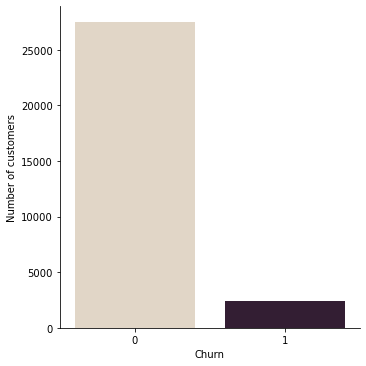

In [519]:
#Checking the number of 'Yes' and 'No' in 'Attrition'
ax = sns.catplot(x="churn", kind="count", palette="ch:.25", data=telecom_data);
ax.set(xlabel = 'Churn', ylabel = 'Number of customers')
plt.show()

The churn customers are very less. Hence the data is highly imbalance.

In [520]:
target_df = pd.DataFrame(telecom_data.churn)
target_col = target_df.columns.tolist()
target_df.head()

,churn
0,1
7,1
8,0
21,0
23,0


#### let's check the columns unique values and then drop those columns with only 1 unique value

In [521]:
telecom_data_unique_col=[]
for i in telecom_data.columns:
    if telecom_data[i].nunique() == 1:
        telecom_data_unique_col.append(i)

telecom_data.drop(telecom_data_unique_col, axis=1, inplace = True)
print("Dropping the unique value columns: ", telecom_data_unique_col)

Dropping the unique value columns:  ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [523]:
# Dropping mobile number columns, as we dont in our anlysis
telecom_data.drop(['mobile_number'], axis=1, inplace=True)
print(telecom_data.shape)
telecom_data.head()

(29953, 160)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,churn
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,08-08-2014,252,252,252,6/21/2014,7/16/2014,08-08-2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,

### Identifying categorical variables

In [524]:
# List the Catogorical columns dervied based on the keywords like 'night', 'monthly', 'fb_user' as they represent recharge packs
Cat_night_cols = pd.Series([k for k in telecom_data.columns.to_list() if 'night' in k])
Cat_monthly_cols = pd.Series([k for k in telecom_data.columns.to_list() if 'monthly' in k])
Cat_fb_user_cols = pd.Series([k for k in telecom_data.columns.to_list() if 'fb_user' in k])
#churn_cols = pd.Series([k for k in telecom_data.columns.to_list() if 'churn' in k])

categorical_cols = pd.concat([Cat_night_cols, Cat_monthly_cols, Cat_fb_user_cols])
categorical_cols = categorical_cols.tolist()
print(categorical_cols)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [525]:
# Dataframe with only categorical variables
tel_Cat_df = telecom_data[categorical_cols]
print(tel_Cat_df.shape)
tel_Cat_df.head()
#telecom_data_Cat_df.head()

(29953, 12)


,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8
0,0.0,0.0,0.0,0,0,0,1,1,1,1.0,1.0,1.0
7,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN
8,NaN,0.0,0.0,0,1,0,0,0,0,NaN,1.0,1.0
21,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN
23,NaN,0.0,0.0,0,0,0,0,2,1,NaN,1.0,1.0


In [526]:
telecom_data_Cat_df = tel_Cat_df
telecom_data_Cat_df.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8
0,0.0,0.0,0.0,0,0,0,1,1,1,1.0,1.0,1.0
7,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN
8,NaN,0.0,0.0,0,1,0,0,0,0,NaN,1.0,1.0
21,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN
23,NaN,0.0,0.0,0,0,0,0,2,1,NaN,1.0,1.0


#### Converting identified categorical columns to object datatype

In [527]:
telecom_data_Cat_df = telecom_data_Cat_df.astype(str)
telecom_data_Cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   night_pck_user_6  29953 non-null  object
 1   night_pck_user_7  29953 non-null  object
 2   night_pck_user_8  29953 non-null  object
 3   monthly_2g_6      29953 non-null  object
 4   monthly_2g_7      29953 non-null  object
 5   monthly_2g_8      29953 non-null  object
 6   monthly_3g_6      29953 non-null  object
 7   monthly_3g_7      29953 non-null  object
 8   monthly_3g_8      29953 non-null  object
 9   fb_user_6         29953 non-null  object
 10  fb_user_7         29953 non-null  object
 11  fb_user_8         29953 non-null  object
dtypes: object(12)
memory usage: 4.0+ MB


#### Working on 'Night pack' columns

In [528]:
# Before Imputing
Valuecount_Nulls(telecom_data_Cat_df, 'night_pck_user_6')

# After Imputing
print('After Imputing')
telecom_data_Cat_df['night_pck_user_6'].replace({'nan':"-1"},inplace=True)
Valuecount_Nulls(telecom_data_Cat_df, 'night_pck_user_6')

Value Counts
0.0    16333
nan    13213
1.0    407  
Name: night_pck_user_6, dtype: int64
Nulls
0
After Imputing
Value Counts
0.0    16333
-1     13213
1.0    407  
Name: night_pck_user_6, dtype: int64
Nulls
0


In [529]:
# Before Imputing
Valuecount_Nulls(telecom_data_Cat_df, 'night_pck_user_7')

# After Imputing
print('After Imputing')
telecom_data_Cat_df['night_pck_user_7'].replace({'nan':"-1"},inplace=True)
Valuecount_Nulls(telecom_data_Cat_df, 'night_pck_user_7')

Value Counts
0.0    16663
nan    12915
1.0    375  
Name: night_pck_user_7, dtype: int64
Nulls
0
After Imputing
Value Counts
0.0    16663
-1     12915
1.0    375  
Name: night_pck_user_7, dtype: int64
Nulls
0


In [530]:
# Before Imputing
Valuecount_Nulls(telecom_data_Cat_df, 'night_pck_user_8')

# After Imputing
print('After Imputing')
telecom_data_Cat_df['night_pck_user_8'].replace({'nan':"-1"},inplace=True)
Valuecount_Nulls(telecom_data_Cat_df, 'night_pck_user_8')

Value Counts
0.0    15594
nan    14018
1.0    341  
Name: night_pck_user_8, dtype: int64
Nulls
0
After Imputing
Value Counts
0.0    15594
-1     14018
1.0    341  
Name: night_pck_user_8, dtype: int64
Nulls
0


#### Working on 'fb_user' columns

In [531]:
Valuecount_Nulls(telecom_data_Cat_df, 'fb_user_6')

# After Imputing
print('After Imputing')
telecom_data_Cat_df['fb_user_6'].replace({'nan':"-1"},inplace=True)
Valuecount_Nulls(telecom_data_Cat_df, 'fb_user_6')

Value Counts
1.0    15511
nan    13213
0.0    1229 
Name: fb_user_6, dtype: int64
Nulls
0
After Imputing
Value Counts
1.0    15511
-1     13213
0.0    1229 
Name: fb_user_6, dtype: int64
Nulls
0


In [532]:
Valuecount_Nulls(telecom_data_Cat_df, 'fb_user_7')

# After Imputing
print('After Imputing')
telecom_data_Cat_df['fb_user_7'].replace({'nan':"-1"},inplace=True)
Valuecount_Nulls(telecom_data_Cat_df, 'fb_user_7')

Value Counts
1.0    15705
nan    12915
0.0    1333 
Name: fb_user_7, dtype: int64
Nulls
0
After Imputing
Value Counts
1.0    15705
-1     12915
0.0    1333 
Name: fb_user_7, dtype: int64
Nulls
0


In [533]:
Valuecount_Nulls(telecom_data_Cat_df, 'fb_user_8')

# After Imputing
print('After Imputing')
telecom_data_Cat_df['fb_user_8'].replace({'nan':"-1"},inplace=True)
Valuecount_Nulls(telecom_data_Cat_df, 'fb_user_8')

Value Counts
1.0    14297
nan    14018
0.0    1638 
Name: fb_user_8, dtype: int64
Nulls
0
After Imputing
Value Counts
1.0    14297
-1     14018
0.0    1638 
Name: fb_user_8, dtype: int64
Nulls
0


In [534]:
Valuecount_Nulls(telecom_data_Cat_df, 'monthly_3g_6')

# Converting columsn with value count less than 9 to 'Other' category
telecom_data_Cat_df['monthly_3g_6'].replace({'8':"Others", '11':"Others", '9':"Others", '14':"Others"},inplace=True)
Valuecount_Nulls(telecom_data_Cat_df, 'monthly_3g_6')

Value Counts
0     25295
1     3430 
2     852  
3     237  
4     76   
5     34   
6     12   
7     9    
8     3    
9     2    
11    2    
14    1    
Name: monthly_3g_6, dtype: int64
Nulls
0
Value Counts
0         25295
1         3430 
2         852  
3         237  
4         76   
5         34   
6         12   
7         9    
Others    8    
Name: monthly_3g_6, dtype: int64
Nulls
0


In [535]:
Valuecount_Nulls(telecom_data_Cat_df, 'monthly_3g_7')

# Converting columsn with value count less than 4 to 'Other' category
telecom_data_Cat_df['monthly_3g_7'].replace({'14':"Others", '12':"Others", '16':"Others", '10':"Others", '11':"Others"},inplace=True)
Valuecount_Nulls(telecom_data_Cat_df, 'monthly_3g_7')

Value Counts
0     25259
1     3293 
2     1007 
3     227  
4     74   
5     42   
6     26   
7     10   
8     5    
9     4    
11    2    
10    1    
12    1    
14    1    
16    1    
Name: monthly_3g_7, dtype: int64
Nulls
0
Value Counts
0         25259
1         3293 
2         1007 
3         227  
4         74   
5         42   
6         26   
7         10   
Others    6    
8         5    
9         4    
Name: monthly_3g_7, dtype: int64
Nulls
0


In [536]:
Valuecount_Nulls(telecom_data_Cat_df, 'monthly_3g_8')

# Converting columsn with value count less than 3 to 'Other' category
telecom_data_Cat_df['monthly_3g_8'].replace({'10':"Others", '16':"Others"},inplace=True)
Valuecount_Nulls(telecom_data_Cat_df, 'monthly_3g_8')

Value Counts
0     25559
1     3132 
2     883  
3     224  
4     91   
5     32   
6     14   
7     9    
9     3    
8     3    
10    2    
16    1    
Name: monthly_3g_8, dtype: int64
Nulls
0
Value Counts
0         25559
1         3132 
2         883  
3         224  
4         91   
5         32   
6         14   
7         9    
Others    3    
9         3    
8         3    
Name: monthly_3g_8, dtype: int64
Nulls
0


In [537]:
Valuecount_Nulls(telecom_data_Cat_df, 'monthly_2g_6')

# Converting columsn with value count less than 9 to 'Other' category
#telecom_data_Cat_df['monthly_3g_6'].replace({'8':"Others", '11':"Others", '9':"Others", '14':"Others"},inplace=True)
#Valuecount_Nulls(telecom_data_Cat_df, 'monthly_3g_6')

Value Counts
0    25355
1    4012 
2    551  
3    28   
4    7    
Name: monthly_2g_6, dtype: int64
Nulls
0


In [538]:
Valuecount_Nulls(telecom_data_Cat_df, 'monthly_2g_7')

# Converting columsn with value count less than 4 to 'Other' category
#telecom_data_Cat_df['monthly_3g_7'].replace({'14':"Others", '12':"Others", '16':"Others", '10':"Others", '11':"Others"},inplace=True)
#Valuecount_Nulls(telecom_data_Cat_df, 'monthly_3g_7')

Value Counts
0    25204
1    4060 
2    649  
3    33   
4    5    
5    2    
Name: monthly_2g_7, dtype: int64
Nulls
0


In [539]:
Valuecount_Nulls(telecom_data_Cat_df, 'monthly_2g_8')

# Converting columsn with value count less than 3 to 'Other' category
#telecom_data_Cat_df['monthly_2g_8'].replace({'10':"Others", '16':"Others"},inplace=True)
#Valuecount_Nulls(telecom_data_Cat_df, 'monthly_2g_8')

Value Counts
0    25816
1    3727 
2    370  
3    30   
4    8    
5    2    
Name: monthly_2g_8, dtype: int64
Nulls
0


In [540]:
telecom_data_Cat_df.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8
0,0.0,0.0,0.0,0,0,0,1,1,1,1.0,1.0,1.0
7,-1,-1,-1,0,0,0,0,0,0,-1,-1,-1
8,-1,0.0,0.0,0,1,0,0,0,0,-1,1.0,1.0
21,-1,-1,-1,0,0,0,0,0,0,-1,-1,-1
23,-1,0.0,0.0,0,0,0,0,2,1,-1,1.0,1.0


In [541]:
null_count_perc(telecom_data_Cat_df)

,NullCount,Null%
night_pck_user_6,0,0.0
night_pck_user_7,0,0.0
night_pck_user_8,0,0.0
monthly_2g_6,0,0.0
monthly_2g_7,0,0.0
monthly_2g_8,0,0.0
monthly_3g_6,0,0.0
monthly_3g_7,0,0.0
monthly_3g_8,0,0.0
fb_user_6,0,0.0


In [542]:
telecom_data_Cat_df.to_csv('telecom_data_Cat_df.csv')

### Encoding

#### Dummy variable creation

Create dummy variables for all categorical predictors using pd built_in function.

We don't need all dummy columns. So we use `drop_first` while creating dummy variables

In [543]:
# Create a function to for dummy variable creation of each categorical predictor
# Create a function to get missing count and missing percentage of the dataframe
def dummyVar_creation(dataF,col):
    dummy = pd.get_dummies(dataF[col], prefix=col, prefix_sep='_',  drop_first=True)
    dataF = pd.concat([dataF,dummy],axis=1)
    del dataF[col]
    
    return dataF

In [544]:
telecom_data_Cat_df = dummyVar_creation(telecom_data_Cat_df, 'monthly_2g_6')
telecom_data_Cat_df = dummyVar_creation(telecom_data_Cat_df, 'monthly_2g_7')
telecom_data_Cat_df = dummyVar_creation(telecom_data_Cat_df, 'monthly_2g_8')

telecom_data_Cat_df = dummyVar_creation(telecom_data_Cat_df, 'monthly_3g_6')
telecom_data_Cat_df = dummyVar_creation(telecom_data_Cat_df, 'monthly_3g_7')
telecom_data_Cat_df = dummyVar_creation(telecom_data_Cat_df, 'monthly_3g_8')

telecom_data_Cat_df = dummyVar_creation(telecom_data_Cat_df, 'night_pck_user_6')
telecom_data_Cat_df = dummyVar_creation(telecom_data_Cat_df, 'night_pck_user_7')
telecom_data_Cat_df = dummyVar_creation(telecom_data_Cat_df, 'night_pck_user_8')

telecom_data_Cat_df = dummyVar_creation(telecom_data_Cat_df, 'fb_user_6')
telecom_data_Cat_df = dummyVar_creation(telecom_data_Cat_df, 'fb_user_7')
telecom_data_Cat_df = dummyVar_creation(telecom_data_Cat_df, 'fb_user_8')

In [545]:
telecom_data_Cat_df.head()

,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_3,monthly_3g_6_4,monthly_3g_6_5,monthly_3g_6_6,monthly_3g_6_7,monthly_3g_6_Others,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_3,monthly_3g_7_4,monthly_3g_7_5,monthly_3g_7_6,monthly_3g_7_7,monthly_3g_7_8,monthly_3g_7_9,monthly_3g_7_Others,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_3,monthly_3g_8_4,monthly_3g_8_5,monthly_3g_8_6,monthly_3g_8_7,monthly_3g_8_8,monthly_3g_8_9,monthly_3g_8_Others,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1


In [546]:
null_count_perc(telecom_data_Cat_df)

,NullCount,Null%
monthly_2g_6_1,0,0.0
monthly_3g_8_9,0,0.0
monthly_3g_7_8,0,0.0
monthly_3g_7_9,0,0.0
monthly_3g_7_Others,0,0.0
monthly_3g_8_1,0,0.0
monthly_3g_8_2,0,0.0
monthly_3g_8_3,0,0.0
monthly_3g_8_4,0,0.0
monthly_3g_8_5,0,0.0


In [547]:
telecom_data_Cat_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   monthly_2g_6_1        29953 non-null  uint8
 1   monthly_2g_6_2        29953 non-null  uint8
 2   monthly_2g_6_3        29953 non-null  uint8
 3   monthly_2g_6_4        29953 non-null  uint8
 4   monthly_2g_7_1        29953 non-null  uint8
 5   monthly_2g_7_2        29953 non-null  uint8
 6   monthly_2g_7_3        29953 non-null  uint8
 7   monthly_2g_7_4        29953 non-null  uint8
 8   monthly_2g_7_5        29953 non-null  uint8
 9   monthly_2g_8_1        29953 non-null  uint8
 10  monthly_2g_8_2        29953 non-null  uint8
 11  monthly_2g_8_3        29953 non-null  uint8
 12  monthly_2g_8_4        29953 non-null  uint8
 13  monthly_2g_8_5        29953 non-null  uint8
 14  monthly_3g_6_1        29953 non-null  uint8
 15  monthly_3g_6_2        29953 non-null  uint8
 16  mont

#### 'telecom_data_Cat_df' is the final dataframe to be considered for categorical variables

### Identifying date columns

In [548]:
telecom_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,churn
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,08-08-2014,252,252,252,6/21/2014,7/16/2014,08-08-2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,

In [549]:
# selecting the columns with datetime format, if any of the data are in object format wil convert them into datetime format
telecom_data_date_df= telecom_data.select_dtypes(include=['object'])
print("\nThe columns to be in datetime format but represented as object\n", telecom_data_date_df.columns)

# Converting the object columns to datetime format
for i in telecom_data_date_df.columns:
    telecom_data[i] = pd.to_datetime(telecom_data[i])


The columns to be in datetime format but represented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


In [550]:
date_cols = telecom_data_date_df.columns.tolist()
print(date_cols)
print(telecom_data_date_df.shape)
telecom_data_date_df.head()

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
(29953, 6)


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/21/2014,7/16/2014,08-08-2014,6/21/2014,7/16/2014,08-08-2014
7,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
8,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
21,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
23,6/18/2014,07-07-2014,8/24/2014,NaN,07-07-2014,08-06-2014


In [551]:
null_count_perc(telecom_data_date_df)

,NullCount,Null%
date_of_last_rech_data_8,14018,46.80
date_of_last_rech_data_6,13213,44.11
date_of_last_rech_data_7,12915,43.12
date_of_last_rech_8,582,1.94
date_of_last_rech_7,98,0.33
date_of_last_rech_6,73,0.24


### Identifying numerical variables

In [552]:
num_cols = [column for column in telecom_data.columns if column not in date_cols + categorical_cols + target_col]

In [553]:
# Creating a dataframe only with numerical columns 
telecom_data_num_df = telecom_data[num_cols]
telecom_data_num_df.head(3)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,968,30.40,0.00,101.20,252.0,252.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,

In [554]:
telecom_data_num_df.shape

(29953, 141)

In [555]:
telecom_data_num_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 141 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    arpu_6                 float64
 1    arpu_7                 float64
 2    arpu_8                 float64
 3    onnet_mou_6            float64
 4    onnet_mou_7            float64
 5    onnet_mou_8            float64
 6    offnet_mou_6           float64
 7    offnet_mou_7           float64
 8    offnet_mou_8           float64
 9    roam_ic_mou_6          float64
 10   roam_ic_mou_7          float64
 11   roam_ic_mou_8          float64
 12   roam_og_mou_6          float64
 13   roam_og_mou_7          float64
 14   roam_og_mou_8          float64
 15   loc_og_t2t_mou_6       float64
 16   loc_og_t2t_mou_7       float64
 17   loc_og_t2t_mou_8       float64
 18   loc_og_t2m_mou_6       float64
 19   loc_og_t2m_mou_7       float64
 20   loc_og_t2m_mou_8       float64
 21   loc_og_t2f_mou_6       float64
 2

### Imputing missing data for the numerical columns

1. Imputing 0 to 2g and 3g data related columns.
2. Calculating total data columns using 2g data and 3g data (total = 2g + 3g)

In [556]:
col_list = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
           'vol_2g_mb_6','vol_3g_mb_6','vol_2g_mb_7','vol_3g_mb_7','vol_2g_mb_8','vol_3g_mb_8',
           'arpu_2g_6','arpu_3g_6', 'arpu_2g_7','arpu_3g_7', 'arpu_2g_8','arpu_3g_8']
for item in col_list:
    telecom_data_num_df[item] = telecom_data_num_df[item].fillna(0)

In [557]:
df_cols = telecom_data_num_df.loc[:,['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
           'vol_2g_mb_6','vol_3g_mb_6','vol_2g_mb_7','vol_3g_mb_7','vol_2g_mb_8','vol_3g_mb_8',
           'arpu_2g_6','arpu_3g_6', 'arpu_2g_7','arpu_3g_7', 'arpu_2g_8','arpu_3g_8']]
df_cols.head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_3g_mb_6,vol_2g_mb_7,vol_3g_mb_7,vol_2g_mb_8,vol_3g_mb_8,arpu_2g_6,arpu_3g_6,arpu_2g_7,arpu_3g_7,arpu_2g_8,arpu_3g_8
0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,83.57,1.32,150.76,5.75,109.61,212.17,212.17,212.17,212.17,212.17,212.17
7,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.0,2.0,3.0,0.0,0.0,0.0,0.00,0.00,356.00,750.95,0.03,11.94,0.00,0.00,0.00,0.00,0.00,19.83
21,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
23,0.0,0.0,0.0,0.0,2.0,2.0,0.00,0.00,0.48,599.09,0.01,1009.92,0.00,0.00,301.78,306.57,150.67,197.27


In [558]:
null_count_perc(df_cols)

,NullCount,Null%
count_rech_2g_6,0,0.0
count_rech_2g_7,0,0.0
arpu_2g_8,0,0.0
arpu_3g_7,0,0.0
arpu_2g_7,0,0.0
arpu_3g_6,0,0.0
arpu_2g_6,0,0.0
vol_3g_mb_8,0,0.0
vol_2g_mb_8,0,0.0
vol_3g_mb_7,0,0.0


In [559]:
telecom_data_num_df['total_data_consumed_6'] = telecom_data_num_df['vol_2g_mb_6'] + telecom_data_num_df['vol_3g_mb_6']
telecom_data_num_df = telecom_data_num_df.drop(['vol_2g_mb_6', 'vol_3g_mb_6'], axis = 1)

telecom_data_num_df['total_data_consumed_7'] = telecom_data_num_df['vol_2g_mb_7'] + telecom_data_num_df['vol_3g_mb_7']
telecom_data_num_df = telecom_data_num_df.drop(['vol_2g_mb_7', 'vol_3g_mb_7'], axis = 1)

telecom_data_num_df['total_data_consumed_8'] = telecom_data_num_df['vol_2g_mb_8'] + telecom_data_num_df['vol_3g_mb_8']
telecom_data_num_df = telecom_data_num_df.drop(['vol_2g_mb_8', 'vol_3g_mb_8'], axis = 1)

In [560]:
telecom_data_num_df['total_arpu_data_6'] = telecom_data_num_df['arpu_2g_6'] + telecom_data_num_df['arpu_3g_6']
telecom_data_num_df = telecom_data_num_df.drop(['arpu_2g_6', 'arpu_3g_6'], axis = 1)

telecom_data_num_df['total_arpu_data_7'] = telecom_data_num_df['arpu_2g_7'] + telecom_data_num_df['arpu_3g_7']
telecom_data_num_df = telecom_data_num_df.drop(['arpu_2g_7', 'arpu_3g_7'], axis = 1)

telecom_data_num_df['total_arpu_data_8'] = telecom_data_num_df['arpu_2g_8'] + telecom_data_num_df['arpu_3g_8']
telecom_data_num_df = telecom_data_num_df.drop(['arpu_2g_8', 'arpu_3g_8'], axis = 1)

In [561]:
df_cols = telecom_data_num_df.loc[:,['total_data_consumed_6', 'total_data_consumed_7', 'total_data_consumed_8',
                                      'total_arpu_data_6','total_arpu_data_7', 'total_arpu_data_8']]
df_cols.head()
null_count_perc(df_cols)

,NullCount,Null%
total_data_consumed_6,0,0.0
total_data_consumed_7,0,0.0
total_data_consumed_8,0,0.0
total_arpu_data_6,0,0.0
total_arpu_data_7,0,0.0
total_arpu_data_8,0,0.0


In [562]:
telecom_data_num_df.shape

(29953, 135)

'Total' columns also have 0% null values

Now, checking remaining columns having more null %

In [563]:
null_count_perc(telecom_data_num_df)


,NullCount,Null%
total_rech_data_8,14018,46.80
max_rech_data_8,14018,46.80
av_rech_amt_data_8,14018,46.80
max_rech_data_6,13213,44.11
max_rech_data_7,12915,43.12
loc_ic_mou_8,1172,3.91
loc_og_t2f_mou_8,1172,3.91
isd_ic_mou_8,1172,3.91
loc_og_t2c_mou_8,1172,3.91
std_ic_t2f_mou_8,1172,3.91


### Imputing missing data in the numerical columns using 'IterativeImputer' for rest of the columns

In [564]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [565]:
# calling the  MICE class
mice_imputer = IterativeImputer()
# imputing the missing value with mice imputer
transformed_teldata_num_df = mice_imputer.fit_transform(telecom_data_num_df)

In [566]:
telecom_data_num_df = pd.DataFrame(transformed_teldata_num_df, columns=telecom_data_num_df.columns)

In [567]:
null_count_perc(telecom_data_num_df)

,NullCount,Null%
arpu_6,0,0.0
isd_ic_mou_7,0,0.0
last_day_rch_amt_6,0,0.0
max_rech_amt_8,0,0.0
max_rech_amt_7,0,0.0
max_rech_amt_6,0,0.0
total_rech_amt_8,0,0.0
total_rech_amt_7,0,0.0
total_rech_amt_6,0,0.0
total_rech_num_8,0,0.0


In [568]:
telecom_data_num_df['aon_mon'] = telecom_data_num_df['aon']/30
telecom_data_num_df.drop('aon', axis=1, inplace=True)
telecom_data_num_df['aon_mon'].head()

0    32.266667
1    26.733333
2    10.500000
3    24.000000
4    20.133333
Name: aon_mon, dtype: float64

In [569]:
print(telecom_data_num_df.shape)
print(telecom_data_Cat_df.shape)

(29953, 135)
(29953, 54)


In [570]:
telecom_data_num_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_data_consumed_6,total_data_consumed_7,total_data_consumed_8,total_arpu_data_6,total_arpu_data_7,total_arpu_data_8,aon_mon
0,197.385,214.816,213.803,-219.096853,-204.27899,0.00,287.637596,289.82529,0.00,32.720283,7.44213,0.00,35.442909,3.909666,0.00,-192.306169,-236.436881,0.00,166.311131,166.070576,0.00,6.463502,6.525401,0.00,3.169215,-2.206104,0.00,-19.604048,-63.802493,0.00,60.444714,64.742874,0.00,182.707228,191.32627,0.00,1.886596,1.911259,0.00,245.017688,258.003814,0.00,-231.891282,-201.494797,0.00,5.926874,7.233167,0.00,0.669177,0.072804,0.0,0.00,0.00,0.00,-78.687992,-91.330173,0.16,153.243753,154.473622,4.13,15.573662,16.342303,1.15,90.081265,79.461767,5.44,-39.977858,-40.385475,0.00,29.750109,31.388789,0.00,2.748316,2.853494,0.00,-7.495189,-6.155694,0.00,0.00,0.00,5.44,-93.604798,-85.544965,0.0,10.607069,10.926062,0.00,1.175462,1.528102,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.000000e+00,252.000000,252.000000,252.000000,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.000000,0.0,0.0,0.0,0.0,0.0,0.0,30.40,0.00,101.20,252.0,252.0,113.7,152.08,115.36,424.34,424.34,424.34,32.266667
1,1069.180,1349.850,3171.480,57.840000,54.68000,52.29,453.430000,567.16000,325.91,16.230000,33.49000,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.76000,49.14,6.660000,20.080000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.190000,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,2.145212e-10,333.040537,213.177113,287.669551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227.444793

In [571]:
telecom_data_Cat_df.head()

,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_3,monthly_3g_6_4,monthly_3g_6_5,monthly_3g_6_6,monthly_3g_6_7,monthly_3g_6_Others,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_3,monthly_3g_7_4,monthly_3g_7_5,monthly_3g_7_6,monthly_3g_7_7,monthly_3g_7_8,monthly_3g_7_9,monthly_3g_7_Others,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_3,monthly_3g_8_4,monthly_3g_8_5,monthly_3g_8_6,monthly_3g_8_7,monthly_3g_8_8,monthly_3g_8_9,monthly_3g_8_Others,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1


In [572]:
telecom_data_Cat_df.reset_index(inplace = True, drop = True)

In [573]:
target_df.head()

,churn
0,1
7,1
8,0
21,0
23,0


In [574]:
target_df.reset_index(inplace = True, drop = True)

In [575]:
# Final dataset contains only numerical and categorical variables. Date columns will be excluded as no information from them will be useful
Final_HVC_telecom_data = pd.concat([telecom_data_num_df, telecom_data_Cat_df, target_df], axis=1)

In [576]:
print(Final_HVC_telecom_data.shape)
Final_HVC_telecom_data.head()

(29953, 190)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_data_consumed_6,total_data_consumed_7,total_data_consumed_8,total_arpu_data_6,total_arpu_data_7,total_arpu_data_8,aon_mon,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_3,monthly_3g_6_4,monthly_3g_6_5,monthly_3g_6_6,monthly_3g_6_7,monthly_3g_6_Others,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_3,monthly_3g_7_4,monthly_3g_7_5,monthly_3g_7_6,monthly_3g_7_7,monthly_3g_7_8,monthly_3g_7_9,monthly_3g_7_Others,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_3,monthly_3g_8_4,monthly_3g_8_5,monthly_3g_8_6,monthly_3g_8_7,monthly_3g_8_8,monthly_3g_8_9,monthly_3g_8_Others,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,churn
0,197.385,214.816,213.803,-219.096853,-204.27899,0.00,287.637596,289.82529,0.00,32.720283,7.44213,0.00,35.442909,3.909666,0.00,-192.306169,-236.436881,0.00,166.311131,166.070576,0.00,6.463502,6.525401,0.00,3.169215,-2.206104,0.00,-19.604048,-63.802493,0.00,60.444714,64.742874,0.00,182.707228,191.32627,0.00,1.886596,1.911259,0.00,245.017688,258.003814,0.00,-231.891282,-201.494797,0.00,5.926874,7.233167,0.00,0.669177,0.072804,0.0,0.00,0.00,0.00,-78.687992,-91.330173,0.16,153.243753,154.473622,4.13,15.573662,16.342303,1.15,90.081265,79.461767,5.44,-39.977858,-40.385475,0.00,29.750109,31.388789,0.00,2.748316,2.853494,0.00,-7.495189,-6.155694,0.00,0.00,0.00,5.44,-93.604798,-85.544965,0.0,10.607069,10.926062,0.00,1.175462,1.528102,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.000000e+00,252.000000,252.000000,252.000000,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.000000,0.0,0.0,0.0,0.0,0.0,0.0,30.40,0.00,101.20,252.0,252.0,113.7,152.08,115.36,424.34,424.34,424.34,32.266667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0

In [577]:
Final_HVC_telecom_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Data columns (total 190 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    arpu_6                 float64
 1    arpu_7                 float64
 2    arpu_8                 float64
 3    onnet_mou_6            float64
 4    onnet_mou_7            float64
 5    onnet_mou_8            float64
 6    offnet_mou_6           float64
 7    offnet_mou_7           float64
 8    offnet_mou_8           float64
 9    roam_ic_mou_6          float64
 10   roam_ic_mou_7          float64
 11   roam_ic_mou_8          float64
 12   roam_og_mou_6          float64
 13   roam_og_mou_7          float64
 14   roam_og_mou_8          float64
 15   loc_og_t2t_mou_6       float64
 16   loc_og_t2t_mou_7       float64
 17   loc_og_t2t_mou_8       float64
 18   loc_og_t2m_mou_6       float64
 19   loc_og_t2m_mou_7       float64
 20   loc_og_t2m_mou_8       float64
 21   loc_og_t2f_mou_6       float64
 2

In [578]:
Final_HVC_telecom_data.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_data_consumed_6,total_data_consumed_7,total_data_consumed_8,total_arpu_data_6,total_arpu_data_7,total_arpu_data_8,aon_mon,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_3,monthly_3g_6_4,monthly_3g_6_5,monthly_3g_6_6,monthly_3g_6_7,monthly_3g_6_Others,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_3,monthly_3g_7_4,monthly_3g_7_5,monthly_3g_7_6,monthly_3g_7_7,monthly_3g_7_8,monthly_3g_7_9,monthly_3g_7_Others,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_3,monthly_3g_8_4,monthly_3g_8_5,monthly_3g_8_6,monthly_3g_8_7,monthly_3g_8_8,monthly_3g_8_9,monthly_3g_8_Others,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,churn
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,2

In [579]:
Churn_HVC_df = Final_HVC_telecom_data.copy(deep=True)

In [580]:
Churn_HVC_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_data_consumed_6,total_data_consumed_7,total_data_consumed_8,total_arpu_data_6,total_arpu_data_7,total_arpu_data_8,aon_mon,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_3,monthly_3g_6_4,monthly_3g_6_5,monthly_3g_6_6,monthly_3g_6_7,monthly_3g_6_Others,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_3,monthly_3g_7_4,monthly_3g_7_5,monthly_3g_7_6,monthly_3g_7_7,monthly_3g_7_8,monthly_3g_7_9,monthly_3g_7_Others,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_3,monthly_3g_8_4,monthly_3g_8_5,monthly_3g_8_6,monthly_3g_8_7,monthly_3g_8_8,monthly_3g_8_9,monthly_3g_8_Others,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,churn
0,197.385,214.816,213.803,-219.096853,-204.27899,0.00,287.637596,289.82529,0.00,32.720283,7.44213,0.00,35.442909,3.909666,0.00,-192.306169,-236.436881,0.00,166.311131,166.070576,0.00,6.463502,6.525401,0.00,3.169215,-2.206104,0.00,-19.604048,-63.802493,0.00,60.444714,64.742874,0.00,182.707228,191.32627,0.00,1.886596,1.911259,0.00,245.017688,258.003814,0.00,-231.891282,-201.494797,0.00,5.926874,7.233167,0.00,0.669177,0.072804,0.0,0.00,0.00,0.00,-78.687992,-91.330173,0.16,153.243753,154.473622,4.13,15.573662,16.342303,1.15,90.081265,79.461767,5.44,-39.977858,-40.385475,0.00,29.750109,31.388789,0.00,2.748316,2.853494,0.00,-7.495189,-6.155694,0.00,0.00,0.00,5.44,-93.604798,-85.544965,0.0,10.607069,10.926062,0.00,1.175462,1.528102,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.000000e+00,252.000000,252.000000,252.000000,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.000000,0.0,0.0,0.0,0.0,0.0,0.0,30.40,0.00,101.20,252.0,252.0,113.7,152.08,115.36,424.34,424.34,424.34,32.266667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0

In [581]:
null_count_perc(Churn_HVC_df)

,NullCount,Null%
arpu_6,0,0.0
total_data_consumed_8,0,0.0
sachet_3g_7,0,0.0
sachet_3g_8,0,0.0
aug_vbc_3g,0,0.0
jul_vbc_3g,0,0.0
jun_vbc_3g,0,0.0
total_rech_data_amt_6,0,0.0
total_rech_data_amt_7,0,0.0
total_data_consumed_6,0,0.0


In [582]:
Churn_HVC_df.shape

(29953, 190)

## EDA

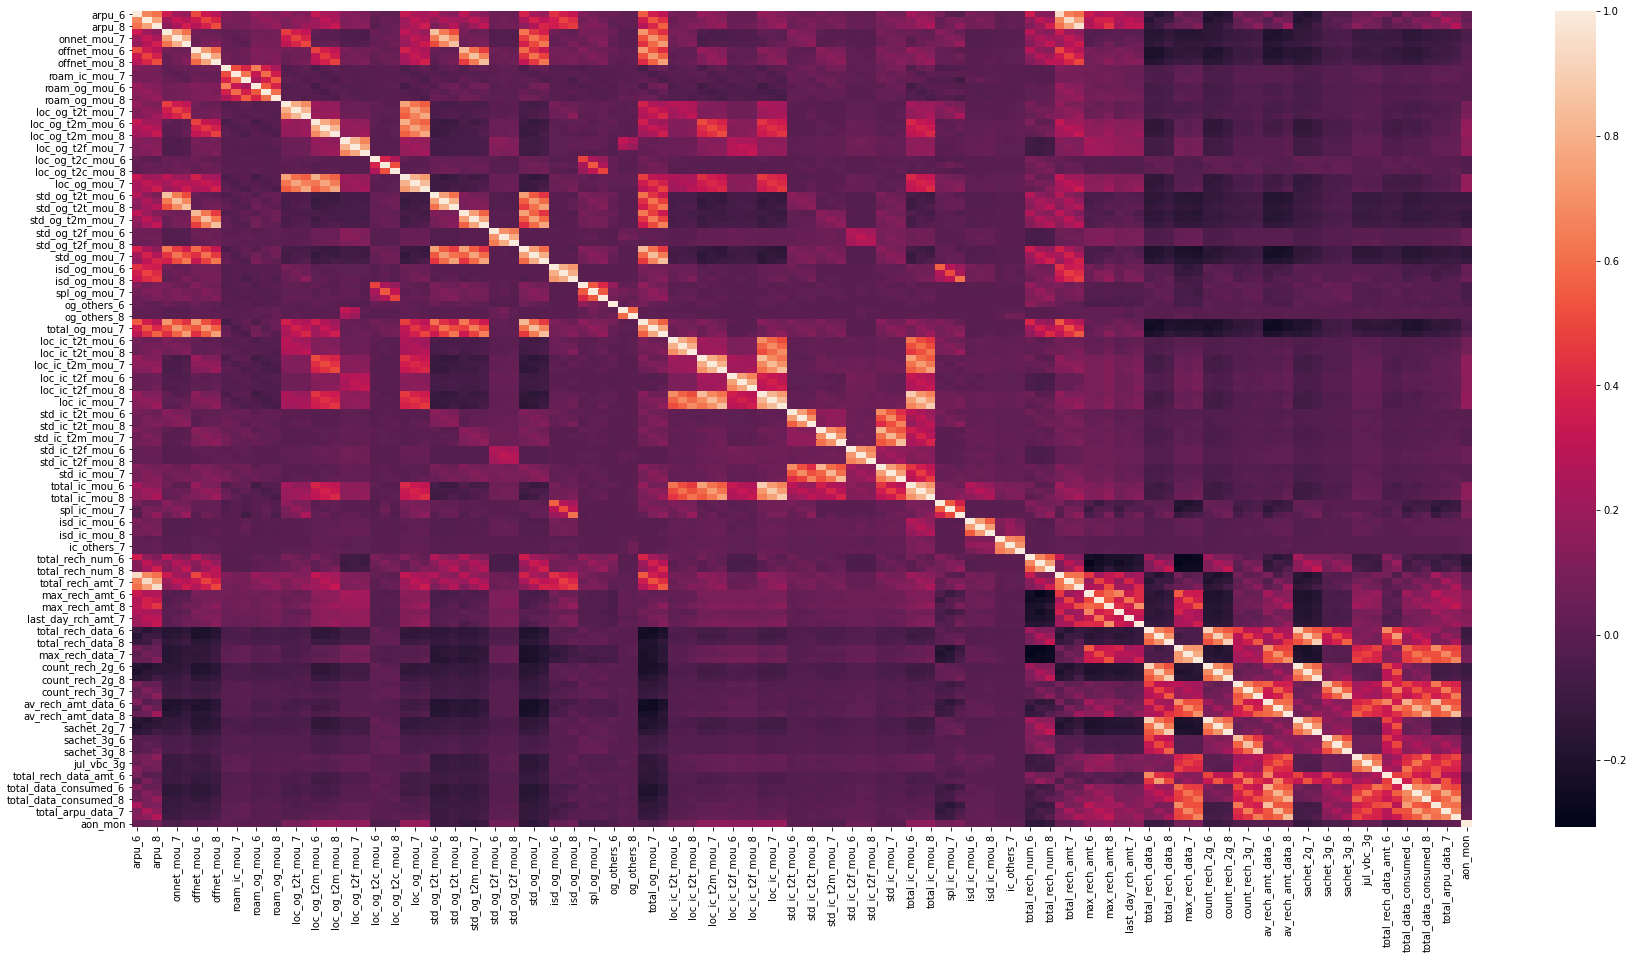

In [583]:
#finding the correlation matrix using heatmap
plt.figure(figsize=(30,15))
sns.heatmap(telecom_data_num_df.corr())
plt.show()

We can see that the columns at the bottom right have high correlation between them

<AxesSubplot:>

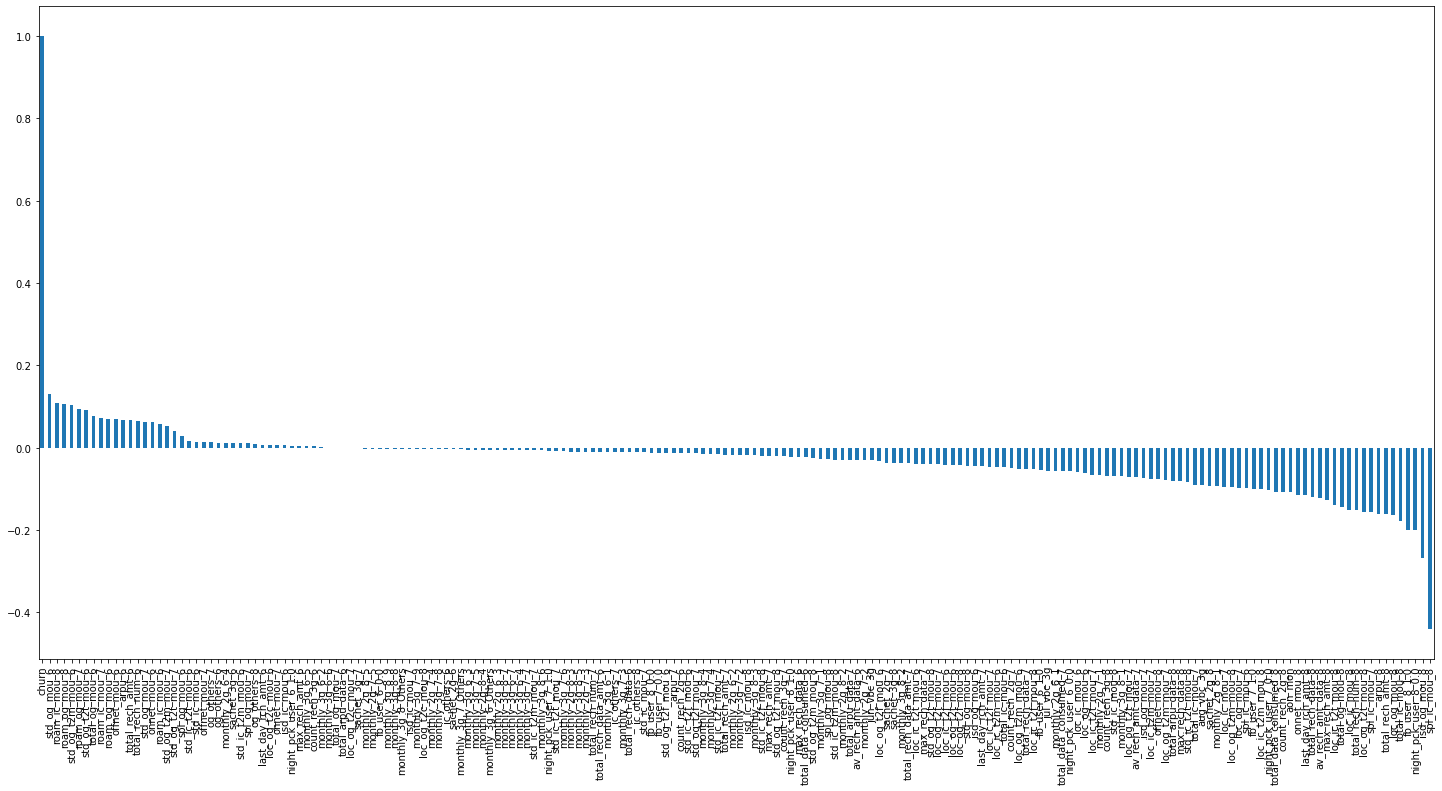

In [584]:
# churn Correlation
plt.figure(figsize=(25,12))
Churn_HVC_df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

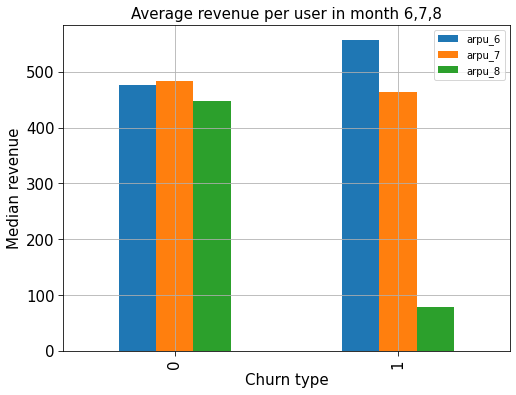

In [744]:
# Plot to visualize average revenue per user(ARPU)
Churn_HVC_df.groupby("churn")["arpu_6","arpu_7","arpu_8"].median().plot.bar(figsize=[8,6])
plt.title("Average revenue per user in month 6,7,8",fontsize=15)
plt.tick_params(size=5,labelsize = 15) 
plt.ylabel("Median revenue",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

If there is monthly decrease in Average revenue from the customers, there is a high chance of churn

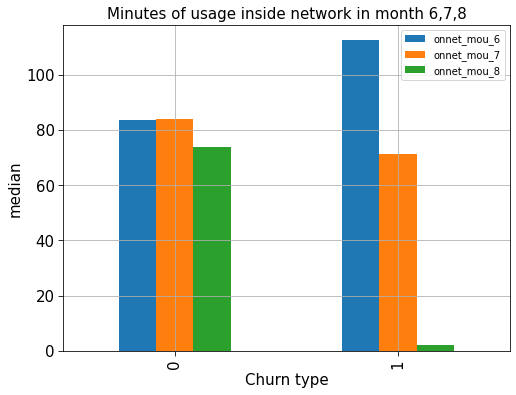

In [746]:
## Plot to visualize onnet_mou
Churn_HVC_df.groupby("churn")["onnet_mou_6","onnet_mou_7","onnet_mou_8" ].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Minutes of usage inside network in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

If the minutes of usage within the network is decrease from June to August, there is high chance of customer being churn.

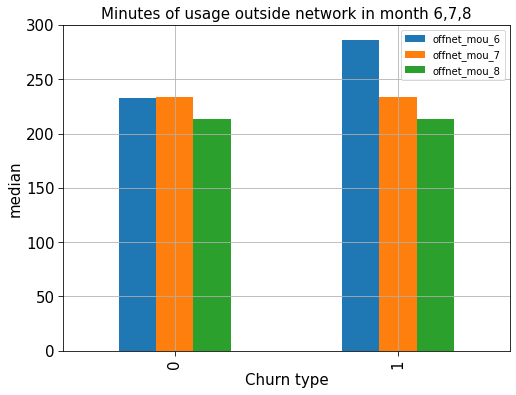

In [748]:
# Plot to visualize  offnet_mou
Churn_HVC_df.groupby("churn")["offnet_mou_6","offnet_mou_7","offnet_mou_8" ].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Minutes of usage outside network in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

If the minutes of usage outside the network is decrease from June to August, there is high chance of customer being churn.

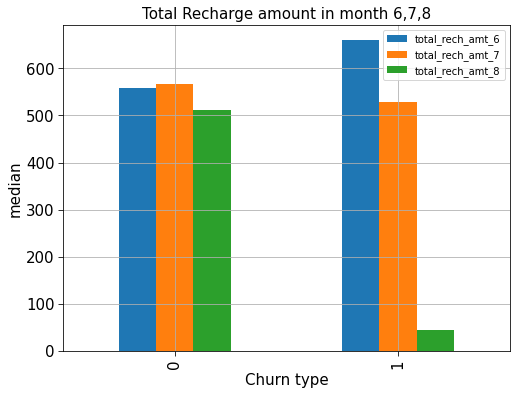

In [749]:
# Plot to visualize total_rech_amt
Churn_HVC_df.groupby("churn")["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8" ].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Total Recharge amount in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

If the recharge amount in August is very less, then there is high chance of customer being churn.

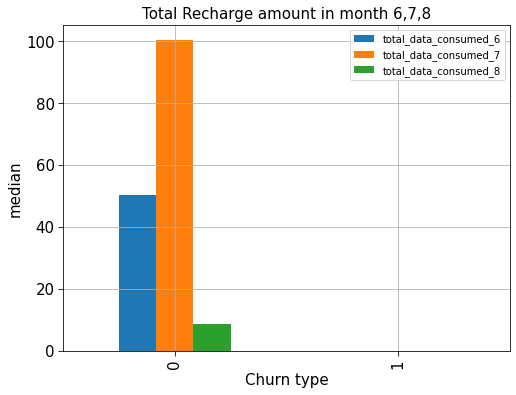

In [750]:
# Plot to visualize total_rech_amt
Churn_HVC_df.groupby("churn")["total_data_consumed_6","total_data_consumed_7","total_data_consumed_8" ].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Total Recharge amount in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

If the data consumption is less in June, July and August, possibility of churn is high

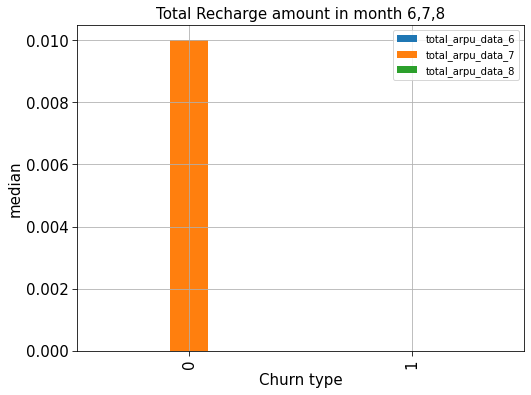

In [751]:
# Plot to visualize total_rech_amt
Churn_HVC_df.groupby("churn")["total_arpu_data_6","total_arpu_data_7","total_arpu_data_8" ].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Total Recharge amount in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

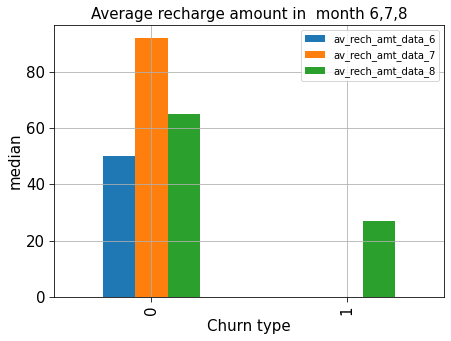

In [752]:
# plot to visualize av_rech_amt_data
Churn_HVC_df.groupby("churn")["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8" ].median().plot.\
bar(figsize=[7,5])

plt.tick_params(size=5,labelsize = 15) 
plt.title("Average recharge amount in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

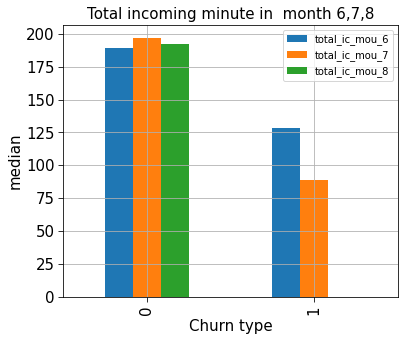

In [756]:
#Plot to visualize total_ic_mou
Churn_HVC_df.groupby("churn")["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Total incoming minute in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

If there is no incoming calls in August, then there is high chance of customer being churn.

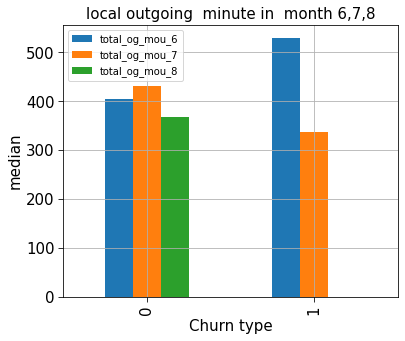

In [843]:
Churn_HVC_df.groupby("churn")["total_og_mou_6","total_og_mou_7","total_og_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("local outgoing  minute in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

If there is no outgoing calls in August, then there is high chance of customer being churn.

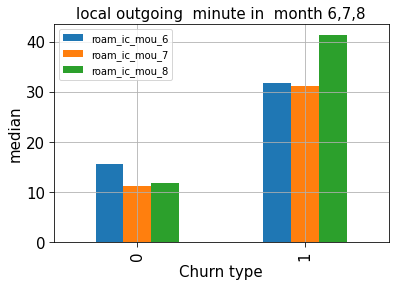

In [759]:
Churn_HVC_df.groupby("churn")["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8"].mean().plot.bar()
plt.tick_params(size=5,labelsize = 15) 
plt.title("local outgoing  minute in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

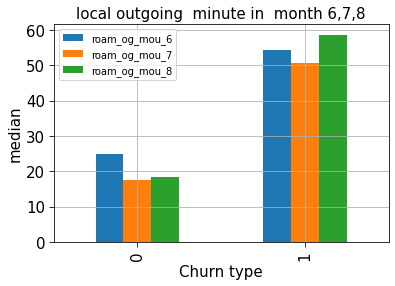

In [760]:
Churn_HVC_df.groupby("churn")["roam_og_mou_6","roam_og_mou_7","roam_og_mou_8"].mean().plot.bar()
plt.tick_params(size=5,labelsize = 15) 
plt.title("local outgoing  minute in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

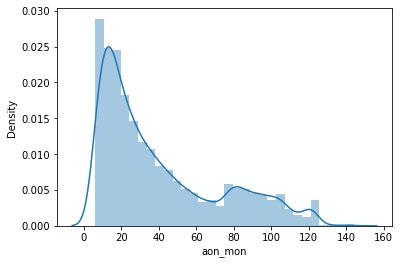

In [753]:
# Checking the distribution of the aon_mon variable
sns.distplot(Churn_HVC_df['aon_mon'],bins=30)
plt.show()

<AxesSubplot:xlabel='churn', ylabel='aon_mon'>

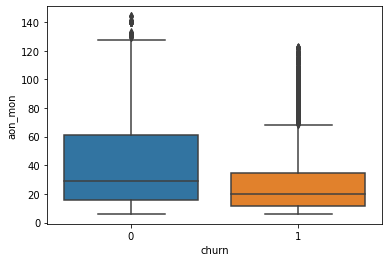

In [754]:
# Relationship between churn and aon_mon
sns.boxplot(x = Churn_HVC_df.churn, y = Churn_HVC_df.aon_mon)

Observation: Tenured customers do not churn

<AxesSubplot:xlabel='total_rech_num_8', ylabel='arpu_8'>

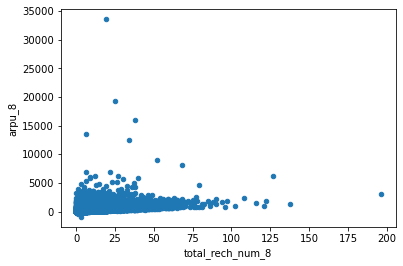

In [755]:
# Relationship between Total recharge in 8th month Vs Average revenue pse User in 8th month
Churn_HVC_df[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')

# Model Building

#### X and y split

In [586]:
y = Churn_HVC_df['churn']
X = Churn_HVC_df.drop(['churn'], axis = 1)

In [587]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

In [588]:
#y = pd.DataFrame(y)
#y.reset_index(inplace = True, drop = True)
#y.head()

## Train and test split

In [589]:
from sklearn.model_selection import train_test_split

In [590]:
#?train_test_split

In [591]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [592]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20967, 189)
(8986, 189)
(20967,)
(8986,)


## Scaling

In [593]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler

In [594]:
num_cols = telecom_data_num_df.columns.tolist()

In [595]:
robustScaler = RobustScaler()
stdScaler = StandardScaler()
minmaxScaler = MinMaxScaler()

#### Scaling only numerical columns

X_train

In [596]:
# Fit transform train data
X_train[num_cols] = stdScaler.fit_transform(X_train[num_cols])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_data_consumed_6,total_data_consumed_7,total_data_consumed_8,total_arpu_data_6,total_arpu_data_7,total_arpu_data_8,aon_mon,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_3,monthly_3g_6_4,monthly_3g_6_5,monthly_3g_6_6,monthly_3g_6_7,monthly_3g_6_Others,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_3,monthly_3g_7_4,monthly_3g_7_5,monthly_3g_7_6,monthly_3g_7_7,monthly_3g_7_8,monthly_3g_7_9,monthly_3g_7_Others,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_3,monthly_3g_8_4,monthly_3g_8_5,monthly_3g_8_6,monthly_3g_8_7,monthly_3g_8_8,monthly_3g_8_9,monthly_3g_8_Others,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
7989,-0.433550,0.345703,-0.503333,-0.452359,-0.435832,-0.478589,-0.003248,-0.179568,-0.629783,-0.216185,-0.168535,-0.159303,-0.232120,-0.206263,-0.181409,-0.239788,-0.195066,-0.299112,0.747081,0.460112,-0.516563,0.097285,-0.083454,-0.305567,-0.256893,-0.199486,-0.242164,0.343559,0.156212,-0.536613,-0.358407,-0.369387,-0.370097,-0.395705,-0.408967,-0.392948,-0.152472,-0.143918,-0.152628,-0.507183,-0.525104,-0.511556,0.034583,0.030005,0.081597,-0.296063,-0.305296,-0.322029,-0.305538,-0.018819,-0.026489,-0.270415,-0.393875,-0.725388,-0.107705,-0.232723,-0.297381,-0.105808,0.084934,-0.480117,-0.334641,-0.329699,-0.335285,-0.180426,-0.117950,-0.537531,0.121419,-0.184982,-0.081493,-0.284298,-0.305125,-0.276139,-0.134934,-0.138948,-0.131022,-0.163168,-0.337037,-0.270096,-0.243828,-0.261827,-0.588328,0.131058,0.136164,0.200997,-0.139447,-0.147609,-0.173416,-0.076090,-0.092176,-0.072965,0.116634,0.129701,-0.431564,-0.401765,0.304328,-0.452317,-0.679963,0.442423,-0.087290,-0.355148,1.104919,0.347249,-0.587852,0.052599,0.129680,-0.426566,1.425274,0.409008,-0.491968,-0.508979,-0.471998,

X_test

In [597]:
# Only transform test data
X_test[num_cols] = stdScaler.transform(X_test[num_cols])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_data_consumed_6,total_data_consumed_7,total_data_consumed_8,total_arpu_data_6,total_arpu_data_7,total_arpu_data_8,aon_mon,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_3,monthly_3g_6_4,monthly_3g_6_5,monthly_3g_6_6,monthly_3g_6_7,monthly_3g_6_Others,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_3,monthly_3g_7_4,monthly_3g_7_5,monthly_3g_7_6,monthly_3g_7_7,monthly_3g_7_8,monthly_3g_7_9,monthly_3g_7_Others,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_3,monthly_3g_8_4,monthly_3g_8_5,monthly_3g_8_6,monthly_3g_8_7,monthly_3g_8_8,monthly_3g_8_9,monthly_3g_8_Others,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
8779,-0.208131,-0.538606,-0.576931,-0.445462,-0.445015,-0.398400,-0.268133,-0.357294,-0.371134,0.206205,-0.168535,-0.181363,-0.122918,-0.206263,-0.198361,-0.168916,-0.138028,-0.121091,0.125781,0.110346,-0.011759,-0.007713,0.226341,-0.193390,-0.256893,-0.199486,-0.242164,-0.023743,-0.009100,-0.095451,-0.394018,-0.413142,-0.378764,-0.427944,-0.437510,-0.385743,2.133347,-0.074514,0.013408,-0.506022,-0.572053,-0.509280,0.034583,0.030005,0.081597,-0.323186,-0.297856,-0.186323,-0.305538,-0.018819,-0.026489,-0.467675,-0.521829,-0.491989,-0.228908,-0.253061,-0.159807,0.633121,-0.091615,-0.046516,1.455426,1.676642,1.326684,0.533249,0.068244,0.068023,-0.195048,-0.185613,-0.186343,-0.010973,-0.162489,0.183492,0.633161,-0.138948,-0.106511,-0.014770,-0.236875,0.034164,0.425819,-0.065441,0.046536,0.131058,0.136164,0.200997,-0.139447,-0.147609,-0.173416,-0.076090,-0.092176,-0.099039,-0.825093,-0.602766,-1.074556,-0.590875,-0.118974,-0.910446,0.339288,0.874625,-0.910953,0.890707,1.671380,-0.615738,-0.235796,-0.272531,-0.540850,-0.148535,1.642393,-0.078757,-0.491968,-0.140746,-0.471998,0.481

In [598]:
X_train_scaled =X_train.copy()
X_test_scaled =X_test.copy()

## Dimentionality reduction using Principal Component Analysis technique

#### PCA without component selection

In [599]:
from sklearn.decomposition import PCA

In [600]:
pca = PCA(random_state=30)

In [601]:
pca.fit_transform(X_train_scaled)

array([[-2.24542770e+00,  1.23848103e+00,  4.08724685e-01, ...,
        -2.87178297e-16,  4.45462589e-16,  4.74588157e-15],
       [ 1.59789276e+00,  3.87332373e+00,  1.90240521e+00, ...,
         3.11040800e-16,  2.41561046e-15, -4.36104913e-16],
       [-4.67946880e+00, -1.41162209e+00, -8.90440416e-01, ...,
         1.66567292e-15, -5.13414002e-15, -3.12720241e-16],
       ...,
       [ 9.94484155e-01,  4.83920554e-02, -2.14974444e+00, ...,
        -9.21238738e-17, -1.16393951e-17,  1.11908860e-16],
       [-9.42231727e-01,  8.08685021e+00,  3.84001246e+00, ...,
         1.07323597e-17,  3.03740362e-16, -5.44893251e-17],
       [ 3.33217398e+00,  2.51203476e+00, -4.07021943e+00, ...,
         5.25778564e-17, -3.92758102e-17,  5.68214815e-17]])

In [602]:
pca.components_

array([[ 1.23709065e-01,  1.32094674e-01,  1.19445690e-01, ...,
        -7.12781436e-02,  8.65068150e-03, -6.27011150e-02],
       [ 8.94520842e-02,  9.58967411e-02,  1.06749682e-01, ...,
         4.14853213e-02, -5.83047370e-03,  4.64684123e-02],
       [ 1.32843567e-01,  1.61115605e-01,  1.50677561e-01, ...,
         1.59405933e-02,  8.59845052e-04,  2.22259067e-02],
       ...,
       [-0.00000000e+00, -2.13175900e-17, -2.17253171e-17, ...,
        -1.81615884e-01,  1.65541170e-01,  1.65541170e-01],
       [-0.00000000e+00, -1.58460515e-18,  7.89347712e-17, ...,
         2.26627669e-01, -3.07364405e-01, -3.07364405e-01],
       [-0.00000000e+00, -1.59494919e-16,  1.51154960e-16, ...,
         1.41204780e-01, -1.24259615e-01, -1.24259615e-01]])

In [603]:
pca.explained_variance_ratio_

array([1.12283351e-01, 9.15430919e-02, 6.74790416e-02, 5.91014091e-02,
       4.17250702e-02, 3.42079238e-02, 3.22892008e-02, 2.63152250e-02,
       2.45418458e-02, 2.35595725e-02, 2.31608904e-02, 2.08781224e-02,
       2.02247419e-02, 2.01046493e-02, 1.95081957e-02, 1.78793555e-02,
       1.60648690e-02, 1.48176817e-02, 1.44019962e-02, 1.29938890e-02,
       1.26964772e-02, 1.20281804e-02, 1.19163991e-02, 1.10381078e-02,
       1.07879836e-02, 9.13882100e-03, 8.69603313e-03, 8.25831408e-03,
       8.04114914e-03, 7.93510885e-03, 7.58392180e-03, 7.38681922e-03,
       6.79364294e-03, 6.69797436e-03, 6.62618709e-03, 6.27960880e-03,
       6.15484688e-03, 6.06078573e-03, 5.80933823e-03, 5.63479394e-03,
       5.42864240e-03, 5.34329090e-03, 4.74749554e-03, 4.72020847e-03,
       4.53908150e-03, 4.45547384e-03, 4.24880305e-03, 4.10666057e-03,
       4.00058796e-03, 3.80288676e-03, 3.70452441e-03, 3.64190842e-03,
       3.50424932e-03, 3.35472934e-03, 3.11808287e-03, 3.00230802e-03,
      

In [604]:
import matplotlib.pyplot as plt

<BarContainer object of 189 artists>

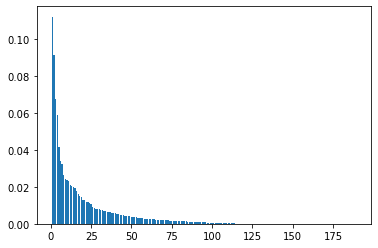

In [605]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [606]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

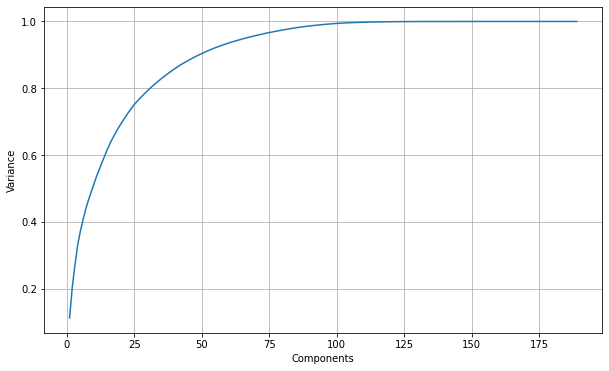

In [607]:
#Skree plot
f = plt.figure(figsize=(10,6))
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.xlabel('Components')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

In [608]:
# look at explainded variance of PCA components
ExpVarRatio = pd.DataFrame(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100, columns=['ExplainedVariance'])
ExpVarRatio

,ExplainedVariance
0,11.23
1,20.38
2,27.13
3,33.04
4,37.21
5,40.63
6,43.86
7,46.49
8,48.95
9,51.30


In [618]:
# Finding the components which explains 95% explained ration
components = max(ExpVarRatio.loc[round(ExpVarRatio.ExplainedVariance) == 95].index)
print(components)
PrincComp = PCA(n_components=components, random_state=30)

67


In [619]:
Transformed_X_train_scaled = PrincComp.fit_transform(X_train_scaled)

In [620]:
PrincComp.components_

array([[ 0.12370906,  0.13209467,  0.11944569, ..., -0.07127814,
         0.00865068, -0.06270112],
       [ 0.08945208,  0.09589674,  0.10674968, ...,  0.04148532,
        -0.00583047,  0.04646841],
       [ 0.13284357,  0.16111561,  0.15067756, ...,  0.01594059,
         0.00085984,  0.02222591],
       ...,
       [-0.03689393, -0.02370977, -0.01508005, ...,  0.0065272 ,
         0.01407536, -0.02291828],
       [ 0.03908298,  0.04497061,  0.08911533, ..., -0.10123476,
        -0.03729679, -0.06993311],
       [ 0.01665155, -0.02571183,  0.015023  , ...,  0.01932325,
        -0.00324677,  0.00678496]])

In [621]:
Transformed_X_train_scaled.shape

(20967, 67)

In [622]:
X_train_PCA = pd.DataFrame(Transformed_X_train_scaled)
X_train_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
0,-2.245428,1.238481,0.408725,-1.527092,-0.862326,-0.238422,-0.032927,0.381382,-0.861241,-0.757842,1.092591,-1.283513,0.189390,-0.085047,-0.189176,-0.850761,1.133352,-0.460376,-2.852616,0.047608,-0.265088,0.755310,-0.548278,-0.095540,-0.289797,-0.535027,-0.268901,-0.847267,0.405583,0.053576,-0.793840,0.559455,-0.169495,0.052502,-0.043186,-0.024797,-1.044735,0.759051,-0.141915,0.326816,-0.626456,-0.265090,0.100531,-0.621230,0.068608,-0.016269,0.381439,-0.084099,0.697751,-0.762646,-0.040820,-0.053927,0.260946,0.483498,0.416638,0.011933,1.040636,-0.106482,0.603713,-0.012907,0.038689,0.329271,-0.146593,-0.026732,0.243900,-0.431972,-0.015575
1,1.597893,3.873324,1.902405,-2.268317,5.015491,0.229800,2.705122,-0.139752,-1.859623,1.175629,-1.801307,1.804511,0.234267,0.293994,-1.536179,-0.863373,-0.035349,-1.468632,-2.081184,2.776995,2.500544,-0.447488,1.448799,-0.723134,1.075790,-1.899212,0.090062,-3.264574,2.309366,-2.031003,1.112977,-0.562471,0.235163,0.026684,0.805699,1.099541,0.610347,-0.656720,1.511431,-0.447621,0.203477,-0.499734,0.288083,1.206835,-1.007457,-0.296560,0.471311,-1.197987,-0.247467,-0.113177,-0.883098,0.125722,1.559476,0.654488,0.002319,-0.175648,-0.785116,-0.708246,1.273651,-0.204453,0.593520,0.087142,-0.394852,-0.034054,-0.649767,0.592376,-0.577287
2,-4.679469,-1.411622,-0.890440,-4.283944,0.375387,-2.150223,-7.267622,-2.746342,0.952324,4.264579,-2.021319,1.620258,-0.479598,1.741046,-1.481937,-2.113174,-3.413349,-0.860916,1.528640,-3.037207,-1.647029,2.383076,2.221439,-2.727716,0.271406,2.501582,0.146893,-1.578145,-1.147811,0.338168,-0.175128,-1.332166,1.092125,-0.414144,-1.925679,0.172842,1.534852,0.773596,0.505698,-0.180631,0.496093,0.413479,0.567525,-0.706946,-0.434346,-0.796377,0.087607,0.212138,0.153992,0.566370,0.098539,-0.039384,-0.081785,-0.120411,0.446229,0.187834,0.341214,-0.111161,-0.071769,-0.148309,-0.073757,-0.007198,-0.076096,0.165741,0.638729,-0.166168,-0.175322
3,-2.636315,1.376990,-1.291564,-1.872804,-0.518076,-0.338305,-0.147637,0.574594,0.801281,0.170064,0.601295,-0.450710,-0.857708,-0.811107,-0.373582,0.732168,0.879244,0.176843,1.078182,-0.199458,0.910790,-0.452906,-0.415561,-0.845292,0.828257,0.184441,-0.416887,0.537509,0.407155,-0.110732,0.181500,-0.536537,-0.502636,0.244391,0.064619,-0.292413,0.476070,-0.114322,-0.033489,-0.194431,0.150284,-0.052288,0.042219,0.098924,-0.224266,-0.397202,-0.305911,0.135447,0.410672,-1.081246,-0.486962,0.048853,-0.118200,-0.237411,0.698242,-0.096133,0.573519,0.086550,-0.426412,0.000972,-0.035421,0.239627,0.351605,0.197027,0.246083,-0.416216,-0.087631
4,-9.024067,-0.558598,4.027853,6.589630,0.052543,-0.447760,-3.382247,-1.908170,0.421284,5.133938,2.453213,-4.465758,-1.711161,0.886711,-1.716246,-0.886182,-3.340465,-0.271692,-2.107165,-1.026043,1.534718,-2.018226,3.289852,-0.073937,0.597458,2.606812,0.052996,-1.738166,-1.466071,-0.211347,-1.317418,-0.300662,0.633971,-0.728256,-0.145588,-0.007801,-0.258239,0.455516,0.007377,-0.434551,-1.050675,2.301569,1.930012,-0.818800,-0.232814,2.235041,5.747700,0.033219,-0.322044,-2.680462,0.146620,-0.019859,-0.546806,0.044150,-0.709600,-0.528238,1.357093,-0.138616,-0.358208,-0.032090,0.093941,0.136165,0.046710,-0.197383,-0.321667,0.169741,0.605001


In [778]:
X_train_PCA.columns

RangeIndex(start=0, stop=67, step=1)

In [776]:
X_train_scaled.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'night_pck_user_7_0.0', 'night_pck_user_7_1.0', 'night_pck_user_8_0.0',
       'night_pck_user_8_1.0', 'fb_user_6_0.0', 'fb_user_6_1.0',
       'fb_user_7_0.0', 'fb_user_7_1.0', 'fb_user_8_0.0', 'fb_user_8_1.0'],
      dtype='object', length=189)

In [624]:
#Transformed_X_test_scaled = PrincComp.transform(X_test_scaled)

In [625]:
#X_test_PCA = pd.DataFrame(Transformed_X_test_scaled)
#X_test_PCA.head()

In [626]:
100*np.var(X_train_PCA)/sum(np.var(X_train_PCA))

0     11.797810
1     9.618594 
2     7.090142 
3     6.209889 
4     4.384127 
5     3.594287 
6     3.392683 
7     2.764987 
8     2.578655 
9     2.475446 
10    2.433556 
11    2.193701 
12    2.125049 
13    2.112431 
14    2.049761 
15    1.878615 
16    1.687964 
17    1.556920 
18    1.513243 
19    1.365291 
20    1.334041 
21    1.263822 
22    1.252077 
23    1.159793 
24    1.133512 
25    0.960232 
26    0.913707 
27    0.867715 
28    0.844897 
29    0.833756 
30    0.796855 
31    0.776146 
32    0.713819 
33    0.703766 
34    0.696224 
35    0.659809 
36    0.646699 
37    0.636815 
38    0.610396 
39    0.592057 
40    0.570393 
41    0.561424 
42    0.498819 
43    0.495953 
44    0.476898 
45    0.468131 
46    0.446376 
47    0.431443 
48    0.420290 
49    0.399551 
50    0.389095 
51    0.382548 
52    0.368112 
53    0.352428 
54    0.326957 
55    0.315309 
56    0.305104 
57    0.296254 
58    0.291727 
59    0.278956 
60    0.271780 
61    0.256997 
62    0.

Reconfirming by giving the variance ratio as hyperparamter for PCA

In [627]:
# By providing variance value we can also get the suitable principal components.
PrincComp90 = PCA(0.95,random_state=30)
X_train_PCA1 = PrincComp90.fit_transform(X_train_scaled)
print(f"suitable principal components for 90% of variance:{X_train_PCA1.shape[1]}")

suitable principal components for 90% of variance:67


Transforming the test data with the PCA identified components

In [628]:
Transformed_X_test_scaled = PrincComp.transform(X_test_scaled)

In [629]:
X_test_PCA = pd.DataFrame(Transformed_X_test_scaled)
X_test_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
0,-0.874914,0.871594,-2.633914,-1.666674,0.173117,0.188155,0.066608,-0.353111,1.211499,0.761088,0.716622,-0.434112,-0.666040,-0.548374,0.259684,0.681594,0.141874,0.256781,0.066741,-0.260291,0.151525,0.310183,-1.816362,-1.433977,0.682207,0.268108,-0.205005,0.491665,0.269637,-0.305305,-0.468265,-0.940062,-1.252713,0.008182,-0.258754,0.181536,-1.242646,0.566971,0.301546,-0.217875,-0.367581,-0.081274,0.418325,-0.096382,-0.165702,-1.031133,0.000783,-0.041201,-0.085170,-0.046859,-0.130464,0.178434,0.454829,0.205895,0.197979,-0.746909,1.150542,-0.201556,-0.487665,1.318477,0.208715,0.023938,-0.559876,0.380801,-0.648944,0.123252,-0.112108
1,1.303498,6.559382,-2.371487,-1.736142,1.843203,0.785403,1.256865,1.651021,1.792889,-1.084188,-2.142131,-3.469398,0.168829,-0.686196,-0.536594,-0.690332,-4.337910,1.057503,-2.615398,-0.869119,0.474751,-1.691978,0.897591,0.795244,0.696585,-3.635960,1.524206,-2.777055,1.837505,0.875360,-2.663041,2.973964,-1.679513,0.561633,-0.168140,-0.211034,-0.610017,-1.336506,-0.743153,2.877453,1.912941,-3.431058,-1.604719,1.012475,-2.179694,0.037383,2.329918,-1.292701,0.703385,0.625368,-0.662048,0.956922,-0.774621,-1.149783,2.002087,0.067108,0.490632,-0.582816,-0.342736,0.174792,-0.543121,-0.816920,-0.332379,0.226188,0.265833,-0.219788,0.141832
2,-3.853715,0.264937,0.361274,-2.735605,-0.792930,-0.952831,0.372333,0.539604,-0.502366,-0.479864,0.936056,0.897319,0.842771,-0.578780,0.096029,0.620000,0.162352,0.457062,2.171156,0.644645,0.628604,-1.646101,1.257849,0.651953,0.053826,0.733546,-0.031099,0.772631,0.913095,-0.657719,-0.038652,0.075711,0.028524,0.877047,0.103578,-1.072902,1.500361,-0.309939,-0.187805,-0.555372,0.822766,-0.122503,-0.563601,0.541242,-1.268472,-0.692639,0.005075,0.184148,-0.085551,0.260729,-0.022201,-0.021843,-0.019402,-0.136838,-0.578576,-0.158530,-0.779377,0.161878,0.585411,0.338310,-0.033219,0.343641,-0.457959,0.172915,1.197659,-0.614551,-0.054041
3,0.889398,-0.723881,1.025982,-1.780968,-1.081744,-1.969314,2.277573,0.504729,1.049399,0.072206,-0.718396,0.402898,-1.066642,-0.007875,0.319399,0.080815,-1.791378,0.546804,-1.003925,-0.199277,0.626324,-0.659596,0.622918,0.552933,-0.053890,-0.072092,-0.565832,0.655012,-1.077153,-0.036624,1.790199,0.294955,1.340497,-0.150334,0.501231,0.323265,-0.904810,1.093573,-0.826186,-0.179795,-0.640496,0.767487,0.743773,-1.343133,0.834453,-1.247019,-0.728852,0.296681,-0.080876,-0.315107,-0.143567,0.062140,0.122981,-0.543899,0.856963,0.010123,0.214585,0.749311,-0.286329,-0.165997,-0.101980,-1.181292,0.163006,0.501654,0.099979,-0.194579,0.277289
4,-1.823919,3.226832,0.102881,-0.526462,-1.076195,-0.268280,-0.575236,0.653885,-0.991749,-2.645502,-0.580949,0.604044,0.686510,-0.180552,0.442793,-1.537590,2.787581,-0.283357,-0.046902,0.615060,-0.534697,-0.595418,-0.314528,0.610645,-0.063950,-0.553966,-1.128108,-1.536016,-2.644497,0.436315,-0.497303,0.496133,0.650382,-0.632686,-1.044577,0.344031,-0.496167,0.212327,0.810337,-0.726841,-0.321091,0.157536,0.613772,-0.092805,0.676810,-0.135178,0.090347,-0.021949,-0.763046,1.880817,0.670552,0.033582,0.100177,-0.080237,-0.743134,-0.642629,0.831803,1.250636,0.336123,-0.026406,0.431090,0.115679,-0.306416,0.169113,1.937418,-0.210024,-0.041101


#### Helper function to calculate accuracy, f1score etc.

In [630]:
from sklearn import datasets, metrics, model_selection
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [631]:
def print_score(clf, model_name, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        pred_prob = clf.predict_proba(X_train)
        roc_auc = round(metrics.roc_auc_score(y_train,pred_prob[:,1]),4)
        print(f"roc_auc: {roc_auc}")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        f1_score = metrics.f1_score(y_train,clf.predict(X_train))
        recall = metrics.recall_score(y_train,clf.predict(X_train))
        precision = metrics.precision_score(y_train,clf.predict(X_train))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")  
        pred_prob = clf.predict_proba(X_test)
        roc_auc = round(metrics.roc_auc_score(y_test,pred_prob[:,1]),4)
        print(f"roc_auc: {roc_auc}")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        f1_score = metrics.f1_score(y_test,clf.predict(X_test))
        recall = metrics.recall_score(y_test,clf.predict(X_test))
        precision = metrics.precision_score(y_test,clf.predict(X_test))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))
        
    #     return a DataFrame with all the score
    return pd.DataFrame({"Model":[model_name],"precision":[precision],"recall":[recall],"f1_score":[f1_score],
                         "roc_auc":[roc_auc]})

In [632]:
def Sen_Spe_fpr_Ppv_Npv(clf, X, y):
    confusion = confusion_matrix(y, clf.predict(X))
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    # Let's see the sensitivity of our logistic regression model
    print("Sensitivity: {0:.4f}\n".format(TP / float(TP+FN)))

    # Let us calculate specificity
    print("Specificity: {0:.4f}\n".format(TN / float(TN+FP)))

    print("False postive rate: {0:.4f}\n".format(FP/ float(TN+FP)))

    # Positive predictive value 
    print ("Positive predictive value: {0:.4f}\n".format(TP / float(TP+FP)))

    # Negative predictive value 
    print ("Negative predictive value: {0:.4f}\n".format(TN / float(TN+ FN)))

The following models will be built
- Logistic Regression
- Decision Tree
- Bagging with Decision Tree as base estimator
- Bagging with Logistic Regression as base estimator
- Random FOrest
- Gradient Boosting
- XGBoosting

## Logistic regression model + PCA

In [633]:
from sklearn.linear_model import LogisticRegression

In [634]:
#Instantiate logistic regression
logRegr_obj = LogisticRegression(random_state=30, class_weight={0:0.08,1:0.92})
#pass PCA data as input
logRegr_obj.fit(X_train_PCA, y_train)

LogisticRegression(class_weight={0: 0.08, 1: 0.92}, random_state=30)

In [635]:
# List of predicted churn probability
pred_prob_PCA = logRegr_obj.predict_proba(X_train_PCA)
print(len(pred_prob_PCA))

20967


In [636]:
pred_prob_PCA[:,1]

array([3.47370493e-01, 3.42347261e-01, 9.85758467e-01, ...,
       3.69259172e-01, 7.33013711e-04, 1.09680918e-01])

In [637]:
# List of predicted churn
y_train_PCA_pred = logRegr_obj.predict(X_train_PCA)
print(len(y_train_PCA_pred))
y_train_PCA_pred_list = y_train_PCA_pred.tolist()

20967


In [638]:
y_train_pred_final = pd.DataFrame({'Churn':y_train_PCA_pred_list, 'Churn_Prob':pred_prob_PCA[:,1]})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.347370
1,0,0.342347
2,1,0.985758
3,0,0.102572
4,0,0.075519


In [639]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.347370,0
1,0,0.342347,0
2,1,0.985758,1
3,0,0.102572,0
4,0,0.075519,0


In [640]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[16615     0]
 [    0  4352]]


In [641]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

1.0


Finding optimum cutoff

In [642]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.347370,0,1,1,1,1,0,0,0,0,0,0
1,0,0.342347,0,1,1,1,1,0,0,0,0,0,0
2,1,0.985758,1,1,1,1,1,1,1,1,1,1,1
3,0,0.102572,0,1,1,0,0,0,0,0,0,0,0
4,0,0.075519,0,1,0,0,0,0,0,0,0,0,0


In [643]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.207564  1.000000  0.000000
0.1  0.1   0.514761  1.000000  0.387662
0.2  0.2   0.699099  1.000000  0.620283
0.3  0.3   0.826632  1.000000  0.781222
0.4  0.4   0.924023  1.000000  0.904123
0.5  0.5   1.000000  1.000000  1.000000
0.6  0.6   0.946058  0.740119  1.000000
0.7  0.7   0.906520  0.549632  1.000000
0.8  0.8   0.871131  0.379136  1.000000
0.9  0.9   0.842085  0.239200  1.000000


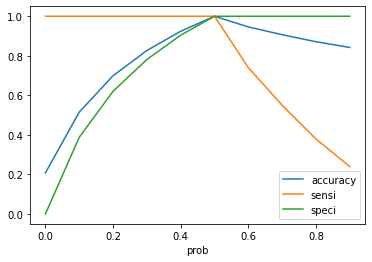

In [644]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Precision and recall tradeoff

In [645]:
from sklearn.metrics import precision_recall_curve

In [646]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

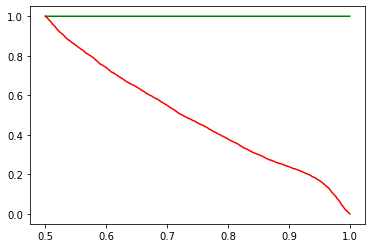

In [647]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Both Precision recall curve and sensitivity-specificity-accuracy curve indicates 0.5 as the probability cut-off.
### So no need to tune Logistic regression model

Evaluating Logistic Regression model on train data

In [648]:
print_score(logRegr_obj, 'LogisticRegression', X_train_PCA, y_train, X_test_PCA, y_test, train=True)

Train Result:

roc_auc: 0.9055
accuracy score: 0.8449

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.85      0.91     19264
           1       0.32      0.82      0.46      1703

    accuracy                           0.84     20967
   macro avg       0.65      0.84      0.69     20967
weighted avg       0.93      0.84      0.87     20967


Confusion Matrix: 
 [[16314  2950]
 [  301  1402]]



,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.322151,0.823253,0.463088,0.9055


In [649]:
res = cross_val_score(logRegr_obj, X_train_PCA, y_train, cv=5, scoring='f1')
print("Cross Validation Score: \t {0}".format(res))
print("Average f1: \t {0:.4f}".format(np.mean(res)))
print("Accuracy f1 SD: \t {0:.4f}".format(np.std(res)))

Cross Validation Score: 	 [0.46141215 0.43851133 0.45961699 0.4470405  0.46412755]
Average f1: 	 0.4541
Accuracy f1 SD: 	 0.0098


In [650]:
Sen_Spe_fpr_Ppv_Npv(logRegr_obj, X_train_PCA, y_train)

Sensitivity: 0.8233

Specificity: 0.8469

False postive rate: 0.1531

Positive predictive value: 0.3222

Negative predictive value: 0.9819



In [651]:
#print_score(logRegr_obj, 'LogisticRegression', X_train_PCA, y_train, X_test_PCA, y_test, train=False)

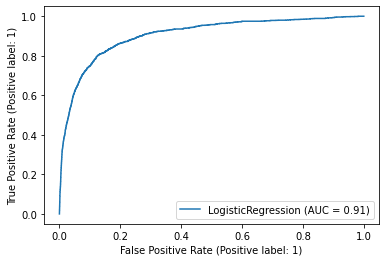

In [652]:
#Plot ROC_AUC Curve for Logistic Regression
metrics.plot_roc_curve(logRegr_obj, X_train_PCA, y_train)
plt.show()

### Decision Tree

In [653]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### with PCA

- Without Hyperparameters

In [654]:
?DecisionTreeClassifier

In [655]:
clf_dt = DecisionTreeClassifier(random_state=42)

In [656]:
clf_dt.fit(X_train_PCA, y_train)

DecisionTreeClassifier(random_state=42)

In [657]:
print_score(clf_dt, 'DecisionTree', X_train_PCA, y_train, X_test_PCA, y_test, train=True)

Train Result:

roc_auc: 1.0
accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19264
           1       1.00      1.00      1.00      1703

    accuracy                           1.00     20967
   macro avg       1.00      1.00      1.00     20967
weighted avg       1.00      1.00      1.00     20967


Confusion Matrix: 
 [[19264     0]
 [    0  1703]]



,Model,precision,recall,f1_score,roc_auc
0,DecisionTree,1.0,1.0,1.0,1.0


In [658]:
Sen_Spe_fpr_Ppv_Npv(clf_dt, X_train_PCA, y_train)

Sensitivity: 1.0000

Specificity: 1.0000

False postive rate: 0.0000

Positive predictive value: 1.0000

Negative predictive value: 1.0000



In [659]:
#print_score(clf_dt, 'DecisionTree', X_train_PCA, y_train, X_test_PCA, y_test, train=False)

In [660]:
#Sen_Spe_fpr_Ppv_Npv(clf_dt, X_test_PCA, y_test)

- With hyperparameters found out by grid search best estimator

In [661]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [662]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf_dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "f1")

In [663]:
%%time
grid_search.fit(X_train_PCA, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Wall time: 59.5 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='f1', verbose=1)

In [664]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=20,
                       random_state=42)

In [665]:
#clf_dt = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=20, random_state=42)
clf_dt = grid_search.best_estimator_

In [666]:
clf_dt.fit(X_train_PCA, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=20,
                       random_state=42)

In [667]:
print_score(clf_dt, 'DecisionTree', X_train_PCA, y_train, X_test_PCA, y_test, train=True)

Train Result:

roc_auc: 0.9706
accuracy score: 0.9479

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     19264
           1       0.74      0.55      0.63      1703

    accuracy                           0.95     20967
   macro avg       0.85      0.77      0.80     20967
weighted avg       0.94      0.95      0.94     20967


Confusion Matrix: 
 [[18943   321]
 [  771   932]]



,Model,precision,recall,f1_score,roc_auc
0,DecisionTree,0.743815,0.54727,0.630582,0.9706


In [668]:
Sen_Spe_fpr_Ppv_Npv(clf_dt, X_train_PCA, y_train)

Sensitivity: 0.5473

Specificity: 0.9833

False postive rate: 0.0167

Positive predictive value: 0.7438

Negative predictive value: 0.9609



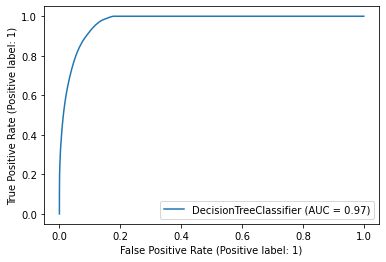

In [669]:
#Plot ROC_AUC Curve for Logistic Regression
metrics.plot_roc_curve(clf_dt, X_train_PCA, y_train)
plt.show()

Text(0, 0.5, 'Feature Importance Score')

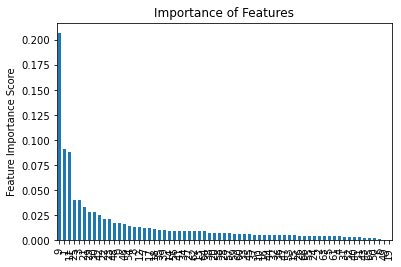

In [670]:
predictors=list(X_train_PCA)
feat_imp = pd.Series(clf_dt.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

## Bagging (oob_score=False)

#### Bagging with Decision tree as base estimator

In [671]:
from sklearn.ensemble import BaggingClassifier

In [672]:
#?BaggingClassifier

In [673]:
bag_clf_df = BaggingClassifier(base_estimator=clf_dt, n_estimators=100,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [674]:
bag_clf_df.fit(X_train_PCA, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=20,
                                                        min_samples_leaf=20,
                                                        random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [675]:
print_score(bag_clf_df, 'DT_bagging', X_train_PCA, y_train, X_test_PCA, y_test, train=True)

Train Result:

roc_auc: 0.9835
accuracy score: 0.9480

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     19264
           1       0.91      0.40      0.55      1703

    accuracy                           0.95     20967
   macro avg       0.93      0.70      0.76     20967
weighted avg       0.95      0.95      0.94     20967


Confusion Matrix: 
 [[19196    68]
 [ 1023   680]]



,Model,precision,recall,f1_score,roc_auc
0,DT_bagging,0.909091,0.399295,0.554876,0.9835


In [676]:
Sen_Spe_fpr_Ppv_Npv(bag_clf_df, X_train_PCA, y_train)

Sensitivity: 0.3993

Specificity: 0.9965

False postive rate: 0.0035

Positive predictive value: 0.9091

Negative predictive value: 0.9494



In [677]:
#print_score(bag_clf_df, 'DT_bagging', X_train_PCA, y_train, X_test_PCA, y_test, train=False)

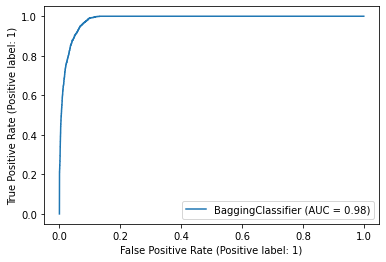

In [678]:
#Plot ROC_AUC Curve for Logistic Regression
metrics.plot_roc_curve(bag_clf_df, X_train_PCA, y_train)
plt.show()

#### Bagging with Logistic Regression as base estimator

In [679]:
bag_clf_lr = BaggingClassifier(base_estimator=logRegr_obj, n_estimators=100,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [680]:
bag_clf_lr.fit(X_train_PCA, y_train)

BaggingClassifier(base_estimator=LogisticRegression(class_weight={0: 0.08,
                                                                  1: 0.92},
                                                    random_state=30),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [681]:
print_score(bag_clf_lr, 'LR_bagging', X_train_PCA, y_train, X_test_PCA, y_test, train=True)

Train Result:

roc_auc: 0.907
accuracy score: 0.8490

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.85      0.91     19264
           1       0.33      0.82      0.47      1703

    accuracy                           0.85     20967
   macro avg       0.66      0.84      0.69     20967
weighted avg       0.93      0.85      0.88     20967


Confusion Matrix: 
 [[16402  2862]
 [  304  1399]]



,Model,precision,recall,f1_score,roc_auc
0,LR_bagging,0.328327,0.821491,0.469148,0.907


In [682]:
Sen_Spe_fpr_Ppv_Npv(bag_clf_lr, X_train_PCA, y_train)

Sensitivity: 0.8215

Specificity: 0.8514

False postive rate: 0.1486

Positive predictive value: 0.3283

Negative predictive value: 0.9818



In [683]:
#print_score(bag_clf_df, 'DT_bagging', X_train_PCA, y_train, X_test_PCA, y_test, train=False)

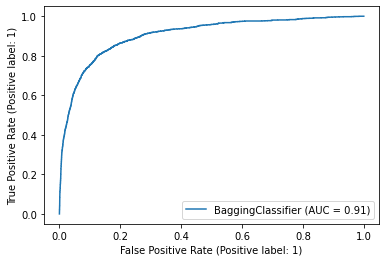

In [684]:
#Plot ROC_AUC Curve for Logistic Regression
metrics.plot_roc_curve(bag_clf_lr, X_train_PCA, y_train)
plt.show()

## Gradiant boosting Classifier

In [685]:
from sklearn.ensemble import GradientBoostingClassifier

In [686]:
#?GradientBoostingClassifier

In [687]:
clf_gb = GradientBoostingClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, verbose=1,random_state=30) # default 
clf_gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 30,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 1,
 'warm_start': False}

In [688]:
# Fit the model to our train and target
clf_gb.fit(X_train_PCA, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.5238           44.33s
         2           0.5005           43.49s
         3           0.4831           43.11s
         4           0.4702           42.77s
         5           0.4602           42.24s
         6           0.4501           41.75s
         7           0.4428           41.37s
         8           0.4359           40.90s
         9           0.4291           40.43s
        10           0.4227           39.96s
        20           0.3822           35.15s
        30           0.3589           30.49s
        40           0.3443           26.06s
        50           0.3341           21.69s
        60           0.3258           17.43s
        70           0.3187           13.07s
        80           0.3130            8.72s
        90           0.3079            4.36s
       100           0.3030            0.00s


GradientBoostingClassifier(min_samples_leaf=5, min_samples_split=10,
                           random_state=30, verbose=1)

In [689]:
y_train_pred = clf_gb.predict(X_train_PCA)

In [690]:
gb_pred_prob = clf_gb.predict_proba(X_train_PCA)
gb_pred_prob

array([[0.97210699, 0.02789301],
       [0.92064337, 0.07935663],
       [0.42595302, 0.57404698],
       ...,
       [0.96299812, 0.03700188],
       [0.99039225, 0.00960775],
       [0.97550127, 0.02449873]])

In [691]:
print_score(clf_gb, 'Gradiant boosting', X_train_PCA, y_train, X_test_PCA, y_test, train=True)

Train Result:

roc_auc: 0.931
accuracy score: 0.9465

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     19264
           1       0.85      0.42      0.56      1703

    accuracy                           0.95     20967
   macro avg       0.90      0.71      0.77     20967
weighted avg       0.94      0.95      0.94     20967


Confusion Matrix: 
 [[19135   129]
 [  992   711]]



,Model,precision,recall,f1_score,roc_auc
0,Gradiant boosting,0.846429,0.417499,0.559182,0.931


In [692]:
Sen_Spe_fpr_Ppv_Npv(clf_gb, X_train_PCA, y_train)

Sensitivity: 0.4175

Specificity: 0.9933

False postive rate: 0.0067

Positive predictive value: 0.8464

Negative predictive value: 0.9507



Text(0, 0.5, 'Feature Importance Score')

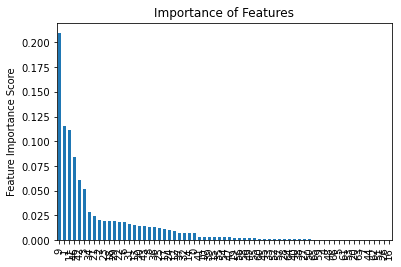

In [693]:
predictors=list(X_train_PCA)
feat_imp = pd.Series(clf_gb.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

## Random Forest

#### Without Hyperparameter tuning

In [694]:
from sklearn.ensemble import RandomForestClassifier

In [695]:
clf_rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [696]:
%%time
clf_rf.fit(X_train_PCA, y_train)

Wall time: 366 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [697]:
print_score(clf_rf, 'Random Forest', X_train_PCA, y_train, X_test_PCA, y_test, train=True)

Train Result:

roc_auc: 0.8453
accuracy score: 0.9266

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     19264
           1       0.91      0.11      0.19      1703

    accuracy                           0.93     20967
   macro avg       0.92      0.55      0.58     20967
weighted avg       0.93      0.93      0.90     20967


Confusion Matrix: 
 [[19247    17]
 [ 1521   182]]



,Model,precision,recall,f1_score,roc_auc
0,Random Forest,0.914573,0.10687,0.191377,0.8453


In [698]:
Sen_Spe_fpr_Ppv_Npv(clf_rf, X_train_PCA, y_train)

Sensitivity: 0.1069

Specificity: 0.9991

False postive rate: 0.0009

Positive predictive value: 0.9146

Negative predictive value: 0.9268



In [699]:
clf_rf.oob_score_

0.9247388753755902

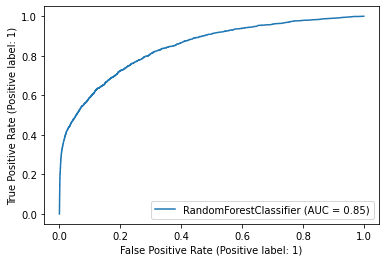

In [700]:
#Plot ROC_AUC Curve for Logistic Regression
metrics.plot_roc_curve(clf_rf, X_train_PCA, y_train)
plt.show()

Text(0, 0.5, 'Feature Importance Score')

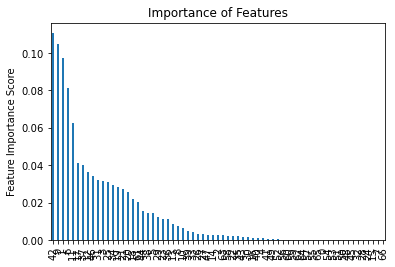

In [701]:
predictors=list(X_train_PCA)
feat_imp = pd.Series(clf_rf.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

#### With Hyperparameter tuning

In [702]:
params = {
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [150,200,300,500]
}

grid_search_rf = GridSearchCV(estimator=clf_rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [703]:
%%time
grid_search_rf.fit(X_train, y_train)

Fitting 4 folds for each of 64 candidates, totalling 256 fits
Wall time: 11min 9s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=4, max_features=5,
                                              n_estimators=10, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 50],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [150, 200, 300, 500]},
             scoring='accuracy', verbose=1)

In [710]:
grid_search_rf.best_estimator_

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=5,
                       n_estimators=150, oob_score=True, random_state=100)

In [711]:
clf_rf = grid_search_rf.best_estimator_

In [712]:
clf_rf.fit(X_train_PCA, y_train)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=5,
                       n_estimators=150, oob_score=True, random_state=100)

In [713]:
print_score(clf_rf, 'Random Forest', X_train_PCA, y_train, X_test_PCA, y_test, train=True)

Train Result:

roc_auc: 0.9627
accuracy score: 0.9461

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     19264
           1       0.95      0.36      0.52      1703

    accuracy                           0.95     20967
   macro avg       0.95      0.68      0.74     20967
weighted avg       0.95      0.95      0.93     20967


Confusion Matrix: 
 [[19229    35]
 [ 1096   607]]



,Model,precision,recall,f1_score,roc_auc
0,Random Forest,0.945483,0.35643,0.517697,0.9627


In [714]:
Sen_Spe_fpr_Ppv_Npv(clf_rf, X_train_PCA, y_train)

Sensitivity: 0.3564

Specificity: 0.9982

False postive rate: 0.0018

Positive predictive value: 0.9455

Negative predictive value: 0.9461



Text(0, 0.5, 'Feature Importance Score')

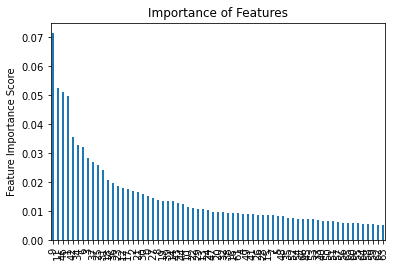

In [715]:
predictors=list(X_train_PCA)
feat_imp = pd.Series(clf_rf.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

## XGBoost

In [716]:
!pip install xgboost

In [717]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [718]:
cfl_xbg = xgb.XGBClassifier(learning_rate=0.1,
                            n_estimators=250,
                            max_depth=5,
                            n_jobs = -1,)
cfl_xbg.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_delta_step': None,
 'max_depth': 5,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 250,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [719]:
# Fit the model to our train and target
cfl_xbg.fit(X_train_PCA, y_train)  # default 

[18:11:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [720]:
print("Train Result:\n")
pred_prob = cfl_xbg.predict_proba(X_train_PCA)
roc_auc = round(metrics.roc_auc_score(y_train,pred_prob[:,1]),4)
print(f"roc_auc: {roc_auc}")
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, cfl_xbg.predict(X_train_PCA))))
print("Classification Report: \n {}\n".format(classification_report(y_train, cfl_xbg.predict(X_train_PCA))))

Train Result:

roc_auc: 0.9985
accuracy score: 0.9871

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19264
           1       0.99      0.85      0.91      1703

    accuracy                           0.99     20967
   macro avg       0.99      0.92      0.95     20967
weighted avg       0.99      0.99      0.99     20967




In [721]:
Sen_Spe_fpr_Ppv_Npv(cfl_xbg, X_train_PCA, y_train)

Sensitivity: 0.8491

Specificity: 0.9993

False postive rate: 0.0007

Positive predictive value: 0.9904

Negative predictive value: 0.9868



Text(0, 0.5, 'Feature Importance Score')

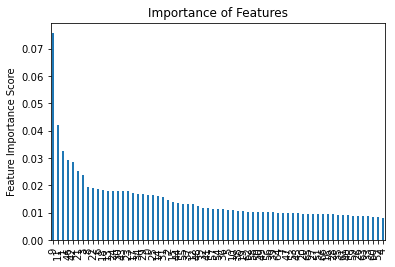

In [722]:
predictors=list(X_train_PCA)
feat_imp = pd.Series(cfl_xbg.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

# Modelling without PCA

- Decision Tree
- Random Forest

In [654]:
#?DecisionTreeClassifier

In [779]:
clf_dt1 = DecisionTreeClassifier(random_state=42)

In [782]:
clf_dt1.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [783]:
print_score(clf_dt1, 'DecisionTree', X_train_scaled, y_train, X_test_scaled, y_test, train=True)

Train Result:

roc_auc: 1.0
accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19264
           1       1.00      1.00      1.00      1703

    accuracy                           1.00     20967
   macro avg       1.00      1.00      1.00     20967
weighted avg       1.00      1.00      1.00     20967


Confusion Matrix: 
 [[19264     0]
 [    0  1703]]



,Model,precision,recall,f1_score,roc_auc
0,DecisionTree,1.0,1.0,1.0,1.0


In [784]:
Sen_Spe_fpr_Ppv_Npv(clf_dt1, X_train_scaled, y_train)

Sensitivity: 1.0000

Specificity: 1.0000

False postive rate: 0.0000

Positive predictive value: 1.0000

Negative predictive value: 1.0000



In [785]:
#print_score(clf_dt, 'DecisionTree', X_train_PCA, y_train, X_test_PCA, y_test, train=False)

In [786]:
#Sen_Spe_fpr_Ppv_Npv(clf_dt, X_test_PCA, y_test)

- With hyperparameters found out by grid search best estimator

In [787]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [788]:
# Instantiate the grid search model
grid_search1 = GridSearchCV(estimator=clf_dt1, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "f1")

In [789]:
%%time
grid_search1.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Wall time: 1min 10s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='f1', verbose=1)

In [790]:
grid_search1.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, random_state=42)

In [791]:
#clf_dt = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=20, random_state=42)
clf_dt1 = grid_search1.best_estimator_

In [792]:
clf_dt1.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, random_state=42)

In [793]:
print_score(clf_dt1, 'DecisionTree_WoPCA', X_train_scaled, y_train, X_test_scaled, y_test, train=True)

Train Result:

roc_auc: 0.9138
accuracy score: 0.9460

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     19264
           1       0.74      0.51      0.61      1703

    accuracy                           0.95     20967
   macro avg       0.85      0.75      0.79     20967
weighted avg       0.94      0.95      0.94     20967


Confusion Matrix: 
 [[18963   301]
 [  831   872]]



,Model,precision,recall,f1_score,roc_auc
0,DecisionTree_WoPCA,0.743393,0.512038,0.606398,0.9138


In [794]:
Sen_Spe_fpr_Ppv_Npv(clf_dt1, X_train_scaled, y_train)

Sensitivity: 0.5120

Specificity: 0.9844

False postive rate: 0.0156

Positive predictive value: 0.7434

Negative predictive value: 0.9580



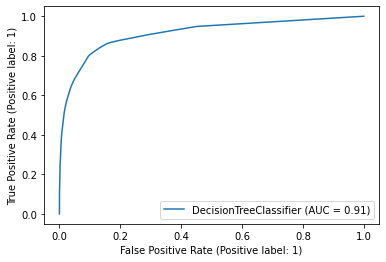

In [795]:
#Plot ROC_AUC Curve for Decision tree
metrics.plot_roc_curve(clf_dt1, X_train_scaled, y_train)
plt.show()

In [832]:
feat_imp = pd.Series(clf_dt1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp_df = pd.DataFrame(feat_imp, columns=['Feature_importnace'])
feat_imp_df['Columns'] = feat_imp_df.index
feat_imp_df.head()

,Feature_importnace,Columns
total_ic_mou_8,0.648704,total_ic_mou_8
fb_user_8_1.0,0.112897,fb_user_8_1.0
roam_og_mou_8,0.042631,roam_og_mou_8
loc_og_t2t_mou_8,0.041009,loc_og_t2t_mou_8
std_og_mou_7,0.037184,std_og_mou_7


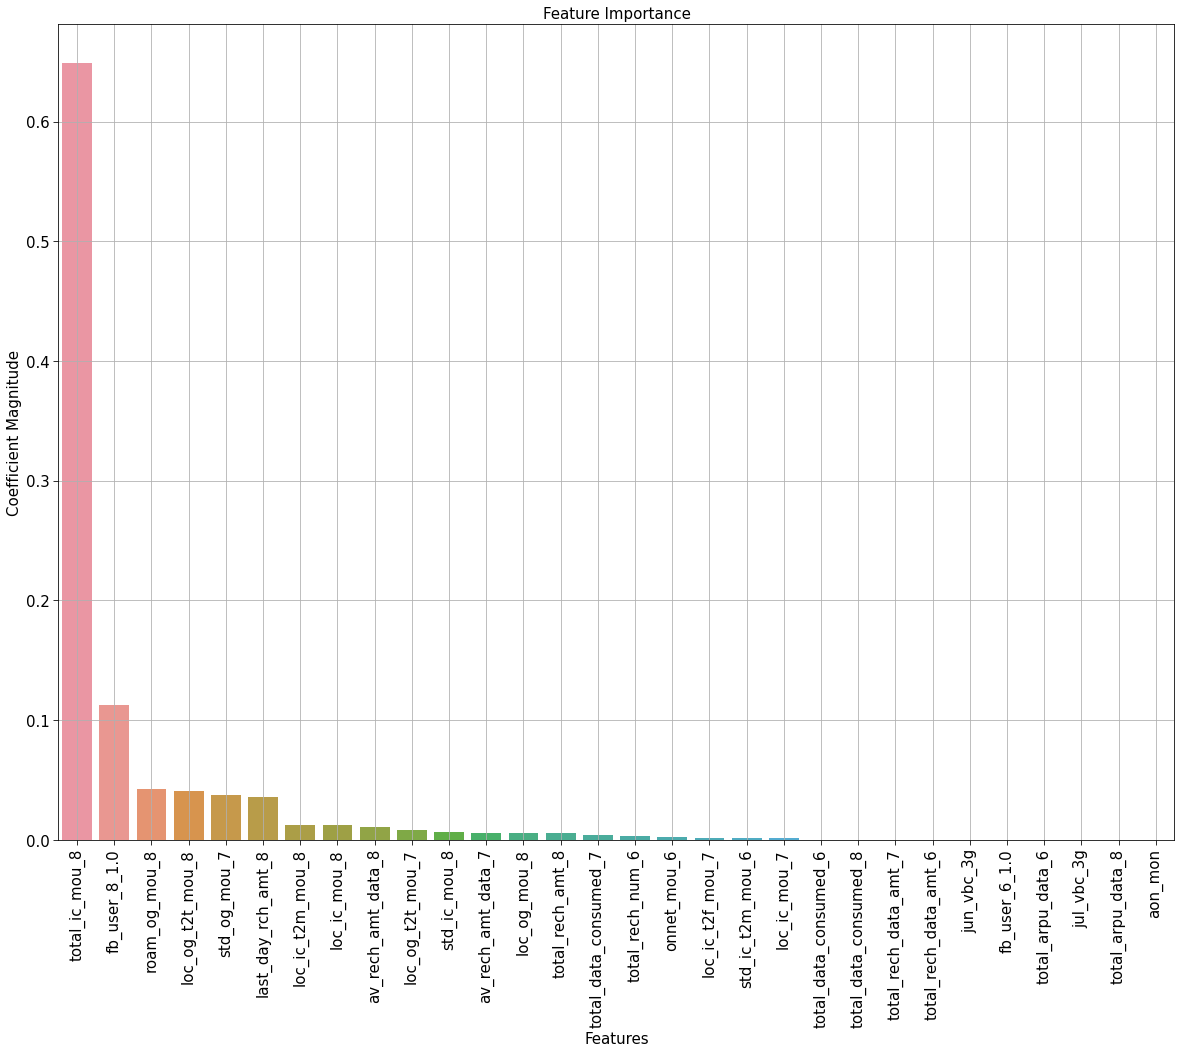

In [833]:
plt.figure(figsize=[20,15])
sns.barplot(x = "Columns",y="Feature_importnace",data=feat_imp_df.head(30))
plt.ylabel('Feature Importance Score')
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

### Random Forest

Without Hyperparameter tuning

In [813]:
from sklearn.ensemble import RandomForestClassifier

In [814]:
clf_rf1 = RandomForestClassifier(oob_score=True)
# n_estimators=10, max_depth=4, max_features=5, random_state=100, 

In [815]:
%%time
clf_rf1.fit(X_train_scaled, y_train)

Wall time: 13.5 s


RandomForestClassifier(oob_score=True)

In [816]:
print_score(clf_rf1, 'Random Forest', X_train_scaled, y_train, X_test_scaled, y_test, train=True)

Train Result:

roc_auc: 1.0
accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19264
           1       1.00      1.00      1.00      1703

    accuracy                           1.00     20967
   macro avg       1.00      1.00      1.00     20967
weighted avg       1.00      1.00      1.00     20967


Confusion Matrix: 
 [[19264     0]
 [    1  1702]]



,Model,precision,recall,f1_score,roc_auc
0,Random Forest,1.0,0.999413,0.999706,1.0


In [817]:
Sen_Spe_fpr_Ppv_Npv(clf_rf1, X_train_scaled, y_train)

Sensitivity: 0.9994

Specificity: 1.0000

False postive rate: 0.0000

Positive predictive value: 1.0000

Negative predictive value: 0.9999



In [818]:
clf_rf1.oob_score_

0.9432441455620737

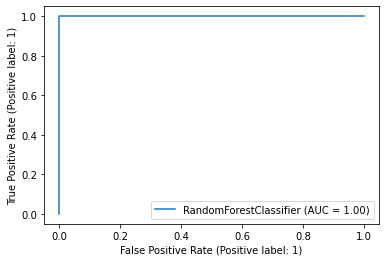

In [819]:
#Plot ROC_AUC Curve for Logistic Regression
metrics.plot_roc_curve(clf_rf1, X_train_scaled, y_train)
plt.show()

Text(0, 0.5, 'Feature Importance Score')

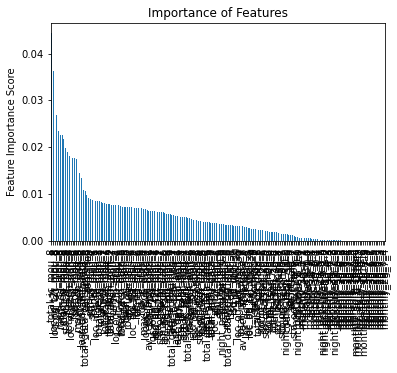

In [820]:
feat_imp = pd.Series(clf_dt1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp_df = pd.DataFrame(feat_imp, columns=['Feature_importnace'])
feat_imp_df['Columns'] = feat_imp_df.index
feat_imp_df.head()

#### With Hyperparameter tuning

In [821]:
params = {
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [150,200,300,500]
}

grid_search_rf1 = GridSearchCV(estimator=clf_rf1,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [822]:
%%time
grid_search_rf1.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 64 candidates, totalling 256 fits
Wall time: 27min 9s


GridSearchCV(cv=4, estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 50],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [150, 200, 300, 500]},
             scoring='accuracy', verbose=1)

In [710]:
grid_search_rf1.best_estimator_

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=5,
                       n_estimators=150, oob_score=True, random_state=100)

In [711]:
clf_rf1 = grid_search_rf1.best_estimator_

In [825]:
clf_rf1.fit(X_train_scaled, y_train)

RandomForestClassifier(oob_score=True)

In [829]:
print_score(clf_rf1, 'Random Forest', X_train_scaled, y_train, X_test_scaled, y_test, train=True)

Train Result:

roc_auc: 1.0
accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19264
           1       1.00      1.00      1.00      1703

    accuracy                           1.00     20967
   macro avg       1.00      1.00      1.00     20967
weighted avg       1.00      1.00      1.00     20967


Confusion Matrix: 
 [[19264     0]
 [    0  1703]]



,Model,precision,recall,f1_score,roc_auc
0,Random Forest,1.0,1.0,1.0,1.0


In [830]:
Sen_Spe_fpr_Ppv_Npv(clf_rf1, X_train_scaled, y_train)

Sensitivity: 1.0000

Specificity: 1.0000

False postive rate: 0.0000

Positive predictive value: 1.0000

Negative predictive value: 1.0000



In [834]:
feat_imp1 = pd.Series(clf_rf1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp1_df = pd.DataFrame(feat_imp1, columns=['Feature_importnace'])
feat_imp1_df['Columns'] = feat_imp1_df.index
feat_imp1_df.head()

,Feature_importnace,Columns
total_ic_mou_8,0.046143,total_ic_mou_8
loc_ic_t2t_mou_8,0.029234,loc_ic_t2t_mou_8
loc_og_t2t_mou_8,0.028046,loc_og_t2t_mou_8
total_og_mou_8,0.027833,total_og_mou_8
onnet_mou_8,0.027172,onnet_mou_8


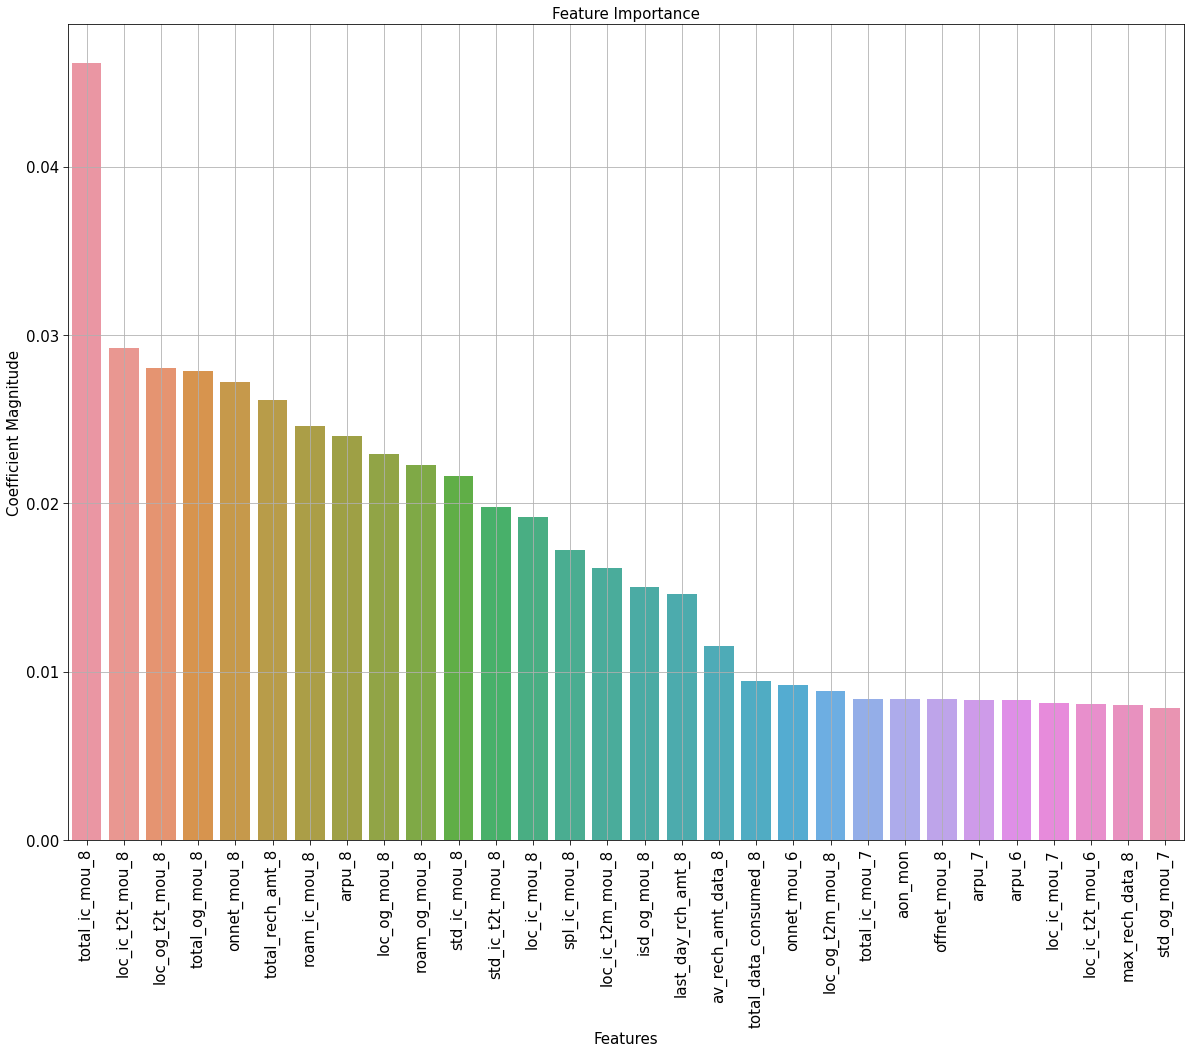

In [835]:
plt.figure(figsize=[20,15])
sns.barplot(x = "Columns",y="Feature_importnace",data=feat_imp1_df.head(30))
plt.ylabel('Feature Importance Score')
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

### Performance evaluation on Test data

Trained models + PCA:
- Logistic Regression(LR): logRegr_obj
- Decisiion Tree(DT): clf_dt
- DT with bagging: bag_clf_df
- LR with bagging: bag_clf_lr
- Gradient Boosting: clf_gb
- Random Forest: clf_rf
- XGBoost: cfl_xbg

#### Logistic regression

In [723]:
df_LR = print_score(logRegr_obj, 'Logistic Regression', X_train_PCA, y_train, X_test_PCA, y_test, train=False)

Test Result:

roc_auc: 0.8899
accuracy score: 0.8409

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      8256
           1       0.31      0.80      0.45       730

    accuracy                           0.84      8986
   macro avg       0.65      0.82      0.68      8986
weighted avg       0.93      0.84      0.87      8986


Confusion Matrix: 
 [[6970 1286]
 [ 144  586]]



In [724]:
Sen_Spe_fpr_Ppv_Npv(logRegr_obj, X_test_PCA, y_test)

Sensitivity: 0.8027

Specificity: 0.8442

False postive rate: 0.1558

Positive predictive value: 0.3130

Negative predictive value: 0.9798



#### Decision Tree

In [725]:
df_DT = print_score(clf_dt, 'Decision Tree', X_train_PCA, y_train, X_test_PCA, y_test, train=False)

Test Result:

roc_auc: 0.7786
accuracy score: 0.9209

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      8256
           1       0.52      0.38      0.44       730

    accuracy                           0.92      8986
   macro avg       0.73      0.67      0.70      8986
weighted avg       0.91      0.92      0.92      8986


Confusion Matrix: 
 [[7999  257]
 [ 454  276]]



In [726]:
Sen_Spe_fpr_Ppv_Npv(clf_dt, X_test_PCA, y_test)

Sensitivity: 0.3781

Specificity: 0.9689

False postive rate: 0.0311

Positive predictive value: 0.5178

Negative predictive value: 0.9463



In [727]:
#Add the score to Dataframe  for comparision 
PermformanceMatrix_df = df_LR.append(df_DT)
PermformanceMatrix_df.dropna(inplace=True)
PermformanceMatrix_df.drop_duplicates(inplace=True)
PermformanceMatrix_df

,Model,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.313034,0.802740,0.450423,0.8899
0,Decision Tree,0.517824,0.378082,0.437055,0.7786


#### Decision Tree with Bagging

In [728]:
df_DT_Bag = print_score(bag_clf_df, 'Decision Tree with Bagging', X_train_PCA, y_train, X_test_PCA, y_test, train=False)

Test Result:

roc_auc: 0.8842
accuracy score: 0.9357

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      8256
           1       0.78      0.29      0.42       730

    accuracy                           0.94      8986
   macro avg       0.86      0.64      0.69      8986
weighted avg       0.93      0.94      0.92      8986


Confusion Matrix: 
 [[8197   59]
 [ 519  211]]



In [729]:
Sen_Spe_fpr_Ppv_Npv(bag_clf_df, X_test_PCA, y_test)

Sensitivity: 0.2890

Specificity: 0.9929

False postive rate: 0.0071

Positive predictive value: 0.7815

Negative predictive value: 0.9405



In [730]:
#Add the score to Dataframe  for comparision 
PermformanceMatrix_df = PermformanceMatrix_df.append(df_DT_Bag)
PermformanceMatrix_df.dropna(inplace=True)
PermformanceMatrix_df.drop_duplicates(inplace=True)
PermformanceMatrix_df

,Model,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.313034,0.802740,0.450423,0.8899
0,Decision Tree,0.517824,0.378082,0.437055,0.7786
0,Decision Tree with Bagging,0.781481,0.289041,0.422000,0.8842


#### LR with Bagging

In [731]:
df_LR_Bag = print_score(bag_clf_lr, 'Logistic Regression with Bagging', X_train_PCA, y_train, X_test_PCA, y_test, train=False)

Test Result:

roc_auc: 0.8908
accuracy score: 0.8428

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      8256
           1       0.32      0.80      0.45       730

    accuracy                           0.84      8986
   macro avg       0.65      0.82      0.68      8986
weighted avg       0.93      0.84      0.87      8986


Confusion Matrix: 
 [[6990 1266]
 [ 147  583]]



In [732]:
Sen_Spe_fpr_Ppv_Npv(bag_clf_lr, X_test_PCA, y_test)

Sensitivity: 0.7986

Specificity: 0.8467

False postive rate: 0.1533

Positive predictive value: 0.3153

Negative predictive value: 0.9794



In [733]:
#Add the score to Dataframe  for comparision 
PermformanceMatrix_df = PermformanceMatrix_df.append(df_LR_Bag)

In [734]:
PermformanceMatrix_df

,Model,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.313034,0.802740,0.450423,0.8899
0,Decision Tree,0.517824,0.378082,0.437055,0.7786
0,Decision Tree with Bagging,0.781481,0.289041,0.422000,0.8842
0,Logistic Regression with Bagging,0.315306,0.798630,0.452113,0.8908


#### Gradient Boosting: clf_gb

In [735]:
df_GB = print_score(clf_gb, 'Gradient Boosting', X_train_PCA, y_train, X_test_PCA, y_test, train=False)

Test Result:

roc_auc: 0.8929
accuracy score: 0.9383

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      8256
           1       0.77      0.34      0.47       730

    accuracy                           0.94      8986
   macro avg       0.86      0.67      0.72      8986
weighted avg       0.93      0.94      0.93      8986


Confusion Matrix: 
 [[8182   74]
 [ 480  250]]



In [736]:
Sen_Spe_fpr_Ppv_Npv(clf_gb, X_test_PCA, y_test)

Sensitivity: 0.3425

Specificity: 0.9910

False postive rate: 0.0090

Positive predictive value: 0.7716

Negative predictive value: 0.9446



In [737]:
PermformanceMatrix_df = PermformanceMatrix_df.append(df_GB)
PermformanceMatrix_df

,Model,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.313034,0.802740,0.450423,0.8899
0,Decision Tree,0.517824,0.378082,0.437055,0.7786
0,Decision Tree with Bagging,0.781481,0.289041,0.422000,0.8842
0,Logistic Regression with Bagging,0.315306,0.798630,0.452113,0.8908
0,Gradient Boosting,0.771605,0.342466,0.474383,0.8929


#### Random Forest: clf_rf

In [738]:
df_RF = print_score(clf_rf, 'Random Forest', X_train_PCA, y_train, X_test_PCA, y_test, train=False)

Test Result:

roc_auc: 0.8696
accuracy score: 0.9349

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      8256
           1       0.84      0.25      0.38       730

    accuracy                           0.93      8986
   macro avg       0.89      0.62      0.67      8986
weighted avg       0.93      0.93      0.92      8986


Confusion Matrix: 
 [[8222   34]
 [ 551  179]]



In [739]:
Sen_Spe_fpr_Ppv_Npv(clf_rf, X_test_PCA, y_test)

Sensitivity: 0.2452

Specificity: 0.9959

False postive rate: 0.0041

Positive predictive value: 0.8404

Negative predictive value: 0.9372



In [740]:
PermformanceMatrix_df = PermformanceMatrix_df.append(df_RF)
PermformanceMatrix_df

,Model,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.313034,0.802740,0.450423,0.8899
0,Decision Tree,0.517824,0.378082,0.437055,0.7786
0,Decision Tree with Bagging,0.781481,0.289041,0.422000,0.8842
0,Logistic Regression with Bagging,0.315306,0.798630,0.452113,0.8908
0,Gradient Boosting,0.771605,0.342466,0.474383,0.8929
0,Random Forest,0.840376,0.245205,0.379639,0.8696


#### XGBoost: cfl_xbg

In [741]:
df_XGB = print_score(cfl_xbg, 'XGBoost', X_train_PCA, y_train, X_test_PCA, y_test, train=False)

Test Result:

roc_auc: 0.8888
accuracy score: 0.9360

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      8256
           1       0.70      0.37      0.49       730

    accuracy                           0.94      8986
   macro avg       0.82      0.68      0.73      8986
weighted avg       0.93      0.94      0.93      8986


Confusion Matrix: 
 [[8139  117]
 [ 458  272]]



In [742]:
Sen_Spe_fpr_Ppv_Npv(cfl_xbg, X_test_PCA, y_test)

Sensitivity: 0.3726

Specificity: 0.9858

False postive rate: 0.0142

Positive predictive value: 0.6992

Negative predictive value: 0.9467



In [743]:
PermformanceMatrix_df = PermformanceMatrix_df.append(df_XGB)
PermformanceMatrix_df

,Model,precision,recall,f1_score,roc_auc
0,Logistic Regression,0.313034,0.802740,0.450423,0.8899
0,Decision Tree,0.517824,0.378082,0.437055,0.7786
0,Decision Tree with Bagging,0.781481,0.289041,0.422000,0.8842
0,Logistic Regression with Bagging,0.315306,0.798630,0.452113,0.8908
0,Gradient Boosting,0.771605,0.342466,0.474383,0.8929
0,Random Forest,0.840376,0.245205,0.379639,0.8696
0,XGBoost,0.699229,0.372603,0.486148,0.8888


The goal is to minimize the detection of churn customers as non-churn customers i.e. not to detect churning customer as non-churning customer. Hence False positives should be less. 
Henc, from the above table , Gradient boosting has the below evaluation results, because:
- ROC_AUC = 0.9055
- Sensitivity: 0.8233
- Specificity: 0.8469 ==> False positives are very less
- Precision = 0.98 
- False postive rate: 0.0041
- Positive predictive value: 0.3222
- Negative predictive value: 0.9819

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     19264
           1       0.32      0.82      0.46      1703

#### Hence, we can clearly see that **Logistic regression** model is performing better, which is providing good results on test data.

In [771]:
#Create a Feature importance dataframe
Feature_importance = pd.DataFrame({"columns":X_train_PCA.columns,"feature_importance":clf_gb.feature_importances_})
FI_sorted = Feature_importance.sort_values(by="feature_importance",ascending=False).head(70)
FI_sorted.head()

,columns,feature_importance
9,9,0.209599
1,1,0.115042
11,11,0.111575
46,46,0.084231
42,42,0.061087


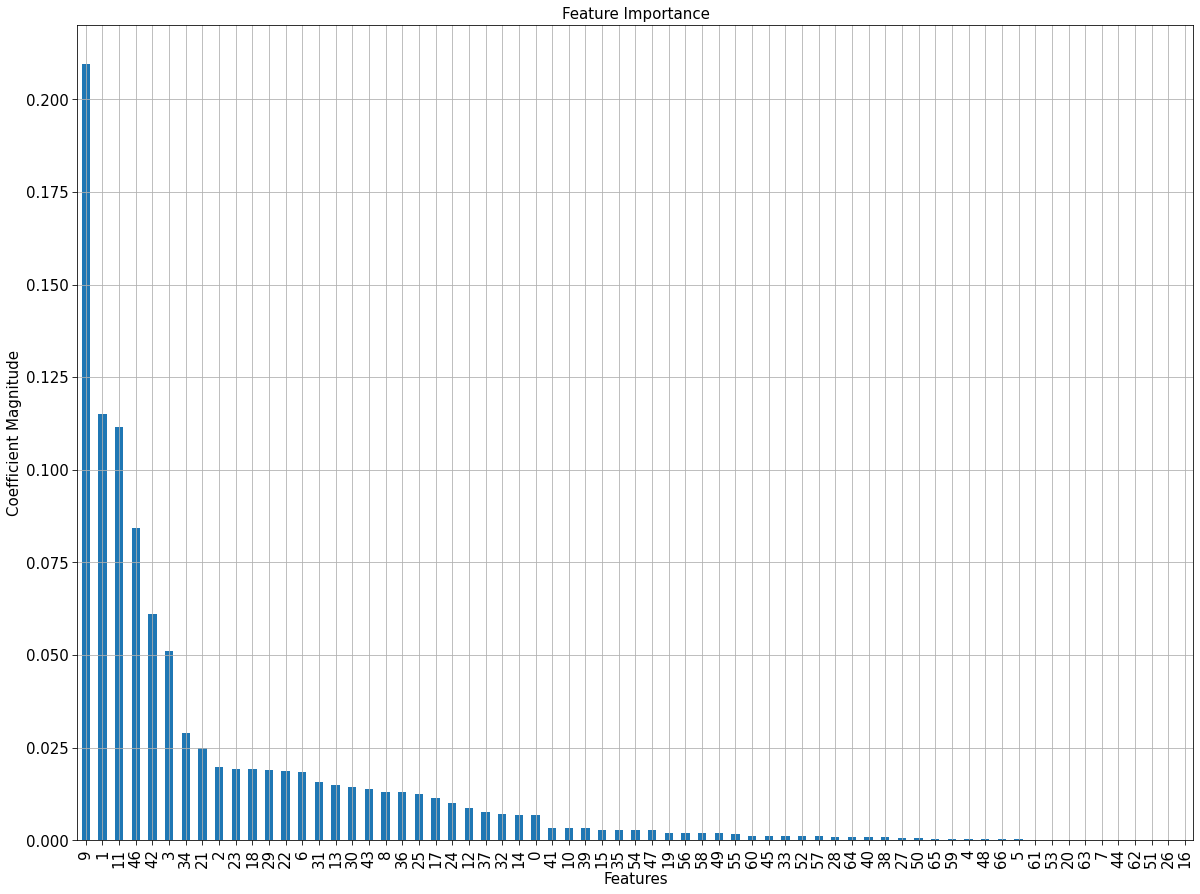

In [773]:
plt.figure(figsize=[20,15])
predictors=list(X_train_PCA)
feat_imp = pd.Series(clf_gb.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

## Evaluation of test data on models trianed without PCA components

#### Random Forest

In [836]:
df_RF1 = print_score(clf_rf1, 'Random Forest', X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Test Result:

roc_auc: 0.9142
accuracy score: 0.9425

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      8256
           1       0.75      0.44      0.55       730

    accuracy                           0.94      8986
   macro avg       0.85      0.71      0.76      8986
weighted avg       0.94      0.94      0.94      8986


Confusion Matrix: 
 [[8147  109]
 [ 408  322]]



In [837]:
Sen_Spe_fpr_Ppv_Npv(clf_rf1, X_test_scaled, y_test)

Sensitivity: 0.4411

Specificity: 0.9868

False postive rate: 0.0132

Positive predictive value: 0.7471

Negative predictive value: 0.9523



#### Decision Tree

In [838]:
df_DT1 = print_score(clf_dt1, 'Decision Tree', X_train_scaled, y_train, X_test_scaled, y_test, train=False)

Test Result:

roc_auc: 0.8836
accuracy score: 0.9419

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      8256
           1       0.71      0.48      0.57       730

    accuracy                           0.94      8986
   macro avg       0.83      0.73      0.77      8986
weighted avg       0.94      0.94      0.94      8986


Confusion Matrix: 
 [[8114  142]
 [ 380  350]]



In [839]:
Sen_Spe_fpr_Ppv_Npv(clf_dt1, X_test_scaled, y_test)

Sensitivity: 0.4795

Specificity: 0.9828

False postive rate: 0.0172

Positive predictive value: 0.7114

Negative predictive value: 0.9553



In [840]:
feat_imp1 = pd.Series(clf_dt1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp1_df = pd.DataFrame(feat_imp1, columns=['Feature_importnace'])
feat_imp1_df['Columns'] = feat_imp1_df.index
feat_imp1_df.head()

,Feature_importnace,Columns
total_ic_mou_8,0.648704,total_ic_mou_8
fb_user_8_1.0,0.112897,fb_user_8_1.0
roam_og_mou_8,0.042631,roam_og_mou_8
loc_og_t2t_mou_8,0.041009,loc_og_t2t_mou_8
std_og_mou_7,0.037184,std_og_mou_7


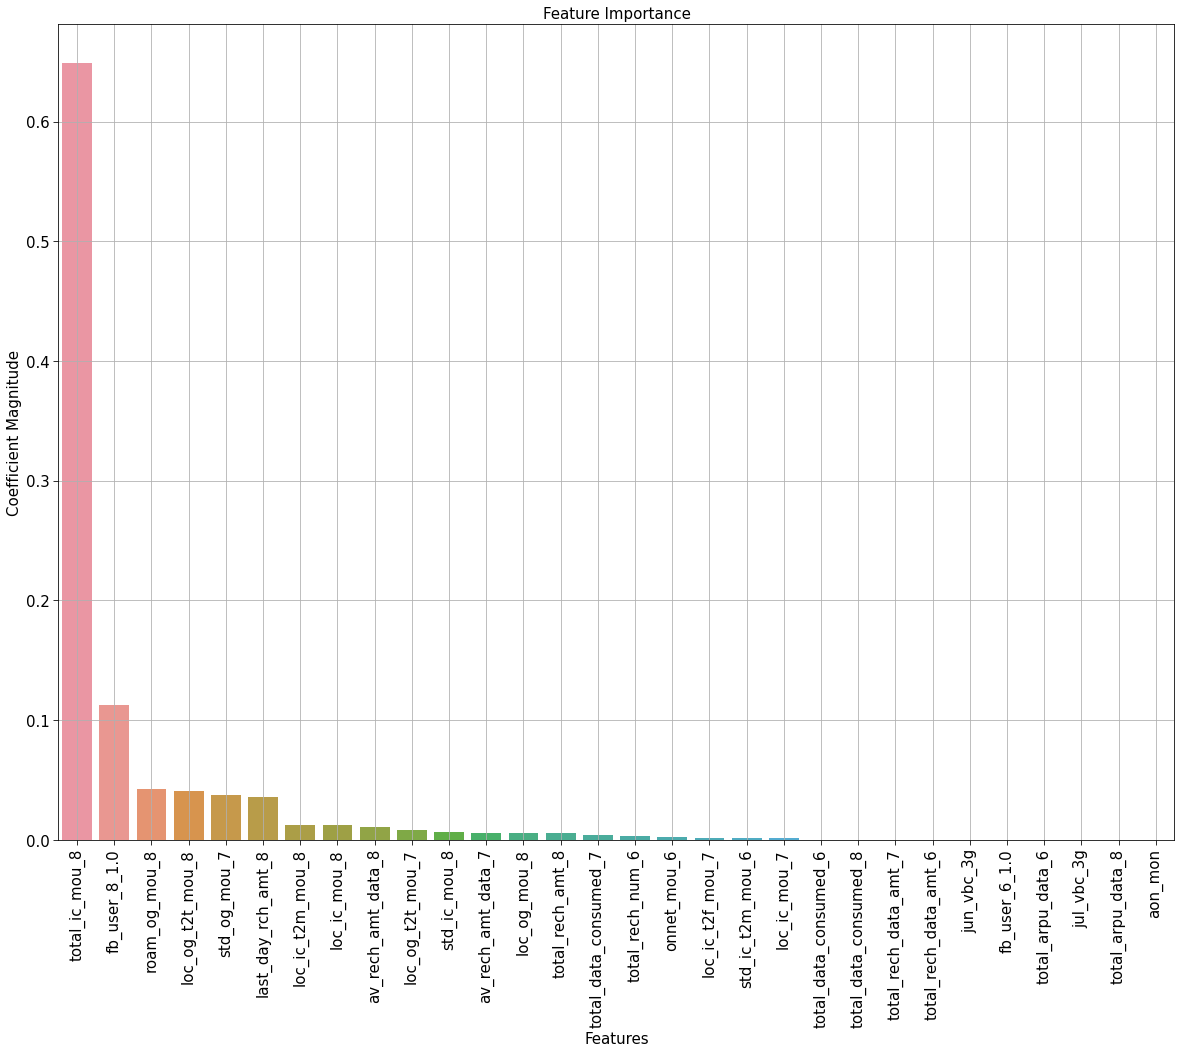

In [841]:
plt.figure(figsize=[20,15])
sns.barplot(x = "Columns",y="Feature_importnace",data=feat_imp1_df.head(30))
plt.ylabel('Feature Importance Score')
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

#### The above bar graph shows the important features which help in finding the customers who tend to churn.

Between Decision Tree and Random Forest modelling, without PCA, **Decision Tree** has given better result with:
- Specificity: 0.9828
- Precision: 0.96

                precision    recall  f1-score   support

           0       0.96      0.98      0.97      8256
           1       0.71      0.48      0.57       730

    accuracy   
    0.94  
    